In [7]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

def linear_function(X, a, b):
    return a * X + b

In [8]:
def sigma_Bz(x,m,b,sigma_x,sigma_m,sigma_b):
    return np.sqrt(m**2*sigma_x**2 + sigma_b**2 + sigma_m**2*x**2)

def sigma_RH(w,m,B,sigma_m,sigma_B):
    return w*np.sqrt( (B**2*sigma_m**2 + m**2*sigma_B**2)/(B**4) )

In [9]:
Ib = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
Bzb = np.array([0, 21.6, 39.8, 61.2, 81.6, 103.7, 124.6, 145.6, 168.4, 188.2])

sigma_Ib = np.array([0.01]*len(Ib))
sigma_Bzb = np.array([0.1]*len(Ib))

In [10]:
popt, pcov = curve_fit(linear_function, Ib, Bzb)

slope = popt[0]
intercept = popt[1]
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

slope, intercept, slope_std_err, intercept_std_err

(209.86060655682022,
 -0.9672730400130842,
 1.229989342050432,
 0.6566346158972638)

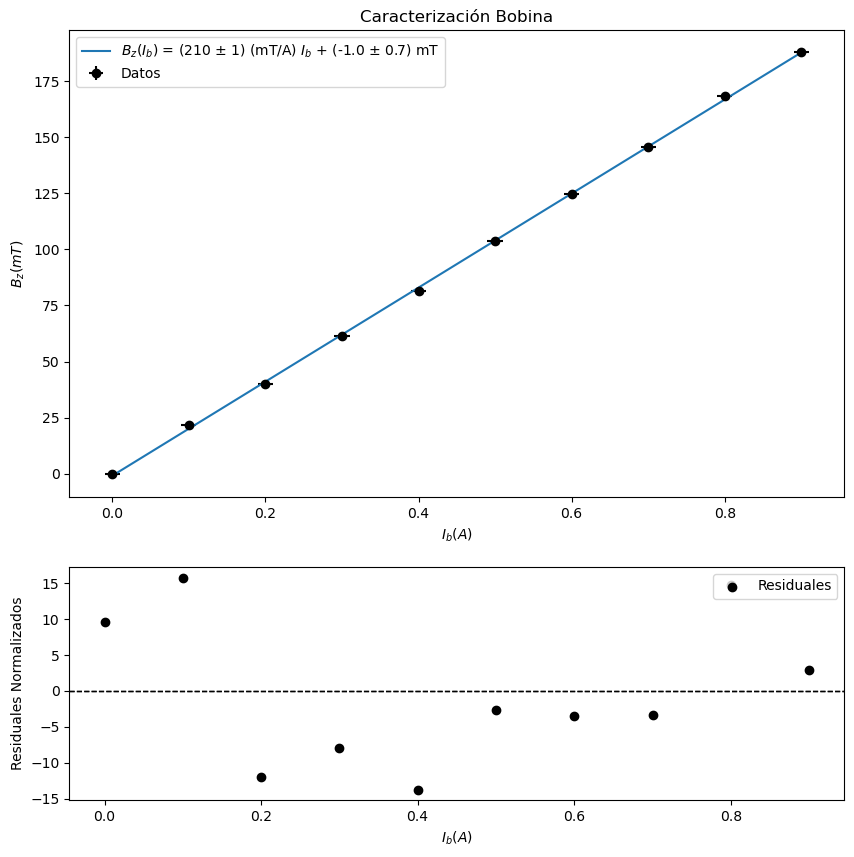

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})
ax[0].errorbar(Ib,Bzb,label="Datos",color="k",yerr= sigma_Bzb, xerr= sigma_Ib,fmt='o')
ax[0].plot(Ib,linear_function(Ib,*popt),
        label=f'$B_z(I_b)$ = ({slope:.0f} ± {slope_std_err:.0f}) (mT/A) $I_b$ + ({intercept:.1f} ± {intercept_std_err:.1f}) mT')
ax[0].legend()

ax[0].set_xlabel('$I_b (A)$')
ax[0].set_ylabel('$B_z (mT)$')
ax[0].legend(loc='upper left')
ax[0].set_title("Caracterización Bobina")

residuals = (Bzb - linear_function(Ib,*popt))/sigma_Bzb

ax[1].axhline(0, color='black', linewidth=1, linestyle='--')
ax[1].set_xlabel('$I_b (A)$')
ax[1].set_ylabel('Residuales Normalizados')
ax[1].axhline(0, color='black', linewidth=1, linestyle='--')

ax[1].scatter(Ib, residuals, alpha=1, color = "k",label="Residuales")
ax[1].legend(loc='upper right')

In [12]:
l = 20*1e-3
d = 10*1e-3
w = 1e-3
At = d*w

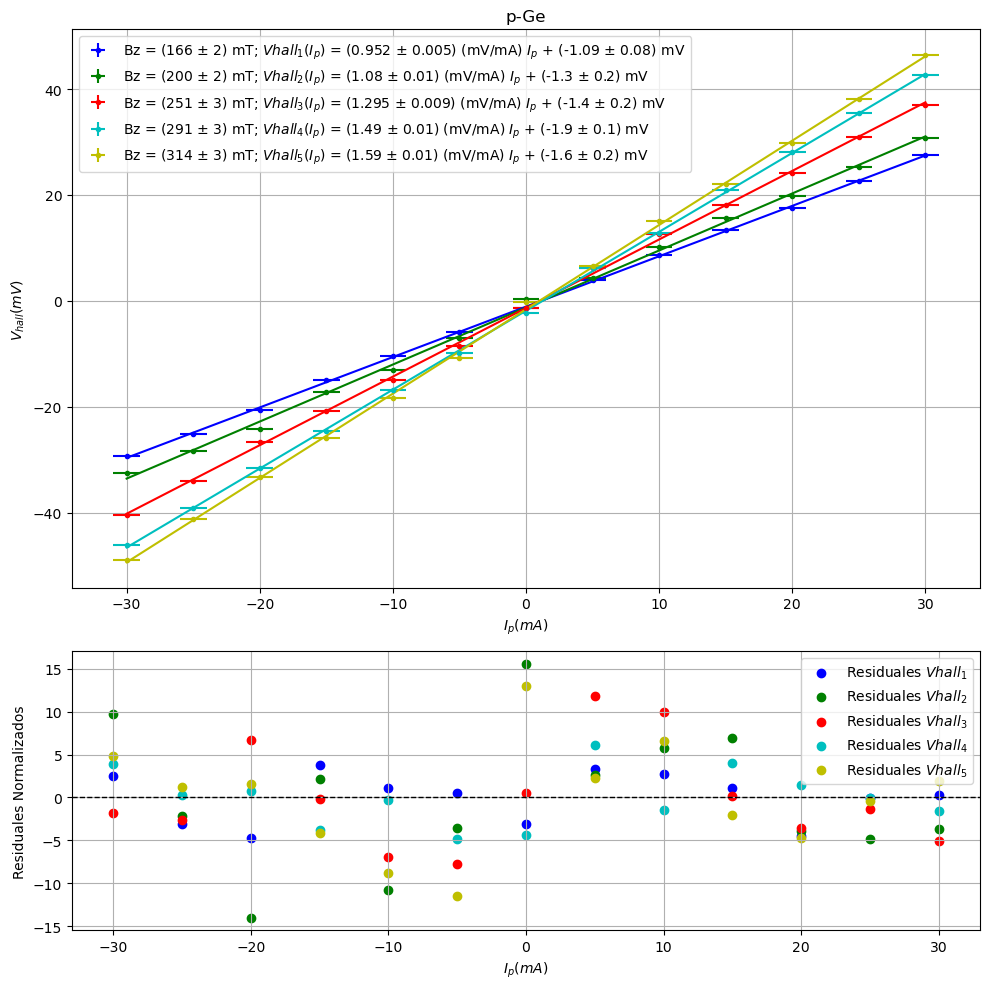

In [13]:
#ACT 2.1
fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

Ip1 = np.array([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])
sigma_Ip1 = np.array([1]*len(Ip1))

#Datos p-Ge

Vhall1 = -np.array([29.4, 25.2, 20.6, 15, 10.5, 5.8, 1.4, -4, -8.7, -13.3, -17.5, -22.7, -27.5]) #0.8 A, 166.92 mT
Vhall2 = -np.array([32.6, 28.4, 24.2, 17.2, 13.1, 7, -0.3, -4.4, -10.1, -15.6, -19.9, -25.2, -30.7]) #0.96 A, 200.5 mT
Vhall3 = -np.array([40.4, 34, 26.6, 20.8, 15, 8.6, 1.3, -6.3, -12.6, -18.1, -24.2, -30.9, -37]) #1.2 A, 250.86 mT
Vhall4 = -np.array([46.2, 39.1, 31.6, 24.6, 16.8, 9.8, 2.3, -6.2, -12.9, -20.9, -28.1, -35.4, -42.7]) #1.39 A, 290.74 mT
Vhall5 = -np.array([48.9, 41.3, 33.3, 25.9, 18.4, 10.7, 0.3, -6.6, -15, -22.1, -29.8, -38.2, -46.4]) #1.5 A, 313.82 mT

sigma_Vhall = np.array([0.1]*len(Vhall1))

popt1, pcov1 = curve_fit(linear_function, Ip1, Vhall1)
popt2, pcov2 = curve_fit(linear_function, Ip1, Vhall2)
popt3, pcov3 = curve_fit(linear_function, Ip1, Vhall3)
popt4, pcov4 = curve_fit(linear_function, Ip1, Vhall4)
popt5, pcov5 = curve_fit(linear_function, Ip1, Vhall5)

slope1 = popt1[0]
intercept1 = popt1[1]
slope_std_err1 = np.sqrt(pcov1[0, 0])
intercept_std_err1 = np.sqrt(pcov1[1, 1])

slope2 = popt2[0]
intercept2 = popt2[1]
slope_std_err2 = np.sqrt(pcov2[0, 0])
intercept_std_err2 = np.sqrt(pcov2[1, 1])

slope3 = popt3[0]
intercept3 = popt3[1]
slope_std_err3 = np.sqrt(pcov3[0, 0])
intercept_std_err3 = np.sqrt(pcov3[1, 1])

slope4 = popt4[0]
intercept4 = popt4[1]
slope_std_err4 = np.sqrt(pcov4[0, 0])
intercept_std_err4 = np.sqrt(pcov4[1, 1])


slope5 = popt5[0]
intercept5 = popt5[1]
slope_std_err5 = np.sqrt(pcov5[0, 0])
intercept_std_err5 = np.sqrt(pcov5[1, 1])

ax[0].errorbar(Ip1, Vhall1, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "b",
             label=f'Bz = (166 ± 2) mT; $Vhall_{1}(I_p)$ = ({slope1:.3f} ± {slope_std_err1:.3f}) (mV/mA) $I_p$ + ({intercept1:.2f} ± {intercept_std_err1:.2f}) mV')
ax[0].errorbar(Ip1, Vhall2, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "g",
             label=f'Bz = (200 ± 2) mT; $Vhall_{2}(I_p)$ = ({slope2:.2f} ± {slope_std_err2:.2f}) (mV/mA) $I_p$ + ({intercept2:.1f} ± {intercept_std_err2:.1f}) mV')
ax[0].errorbar(Ip1, Vhall3, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "r",
             label=f'Bz = (251 ± 3) mT; $Vhall_{3}(I_p)$ = ({slope3:.3f} ± {slope_std_err3:.3f}) (mV/mA) $I_p$ + ({intercept3:.1f} ± {intercept_std_err3:.1f}) mV')
ax[0].errorbar(Ip1, Vhall4, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "c",
             label=f'Bz = (291 ± 3) mT; $Vhall_{4}(I_p)$ = ({slope4:.2f} ± {slope_std_err4:.2f}) (mV/mA) $I_p$ + ({intercept4:.1f} ± {intercept_std_err4:.1f}) mV')
ax[0].errorbar(Ip1, Vhall5, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "y",
             label=f'Bz = (314 ± 3) mT; $Vhall_{5}(I_p)$ = ({slope5:.2f} ± {slope_std_err5:.2f}) (mV/mA) $I_p$ + ({intercept5:.1f} ± {intercept_std_err5:.1f}) mV')

ax[0].plot(Ip1, linear_function(Ip1,*popt1), color="b")
ax[0].plot(Ip1, linear_function(Ip1,*popt2), color= "g")
ax[0].plot(Ip1, linear_function(Ip1,*popt3), color = "r")
ax[0].plot(Ip1, linear_function(Ip1,*popt4), color = "c")
ax[0].plot(Ip1, linear_function(Ip1,*popt5), color = "y")

ax[0].set_xlabel('$I_p (mA)$')
ax[0].set_ylabel('$V_{hall} (mV)$')
ax[0].legend(loc='upper left')
ax[0].set_title("p-Ge")

residuals1 = (Vhall1 - linear_function(Ip1, *popt1))/sigma_Vhall
residuals2 = (Vhall2 - linear_function(Ip1, *popt2))/sigma_Vhall
residuals3 = (Vhall3 - linear_function(Ip1, *popt3))/sigma_Vhall
residuals4 = (Vhall4 - linear_function(Ip1, *popt4))/sigma_Vhall
residuals5 = (Vhall5 - linear_function(Ip1, *popt5))/sigma_Vhall

ax[1].scatter(Ip1, residuals1, alpha=1, label='Residuales $Vhall_1$', color = "b")
ax[1].scatter(Ip1, residuals2, alpha=1, label='Residuales $Vhall_2$', color = "g")
ax[1].scatter(Ip1, residuals3, alpha=1, label='Residuales $Vhall_3$', color = "r")
ax[1].scatter(Ip1, residuals4, alpha=1, label='Residuales $Vhall_4$', color = "c")
ax[1].scatter(Ip1, residuals5, alpha=1, label='Residuales $Vhall_5$', color = "y")


ax[1].axhline(0, color='black', linewidth=1, linestyle='--')
ax[1].set_xlabel('$I_p (mA)$')
ax[1].set_ylabel('Residuales Normalizados')
ax[1].legend(loc='upper right')

ax[0].grid(True)
ax[1].grid(True)

plt.tight_layout()
plt.show()

Text(0, 0.5, '$R_H (m^3/C)$')

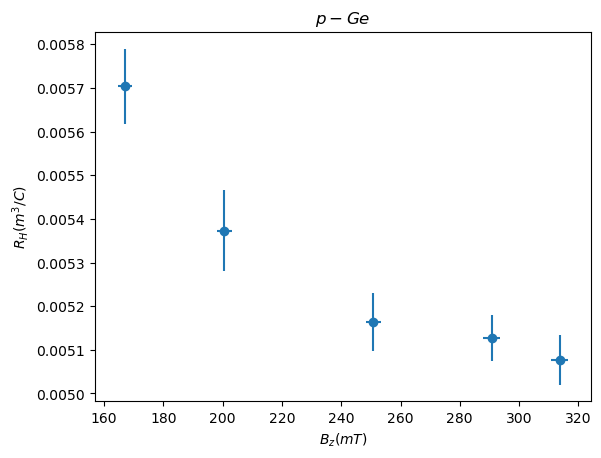

In [14]:
B1 = linear_function(0.8,*popt)
B2 = linear_function(0.96,*popt)
B3 = linear_function(1.2,*popt)
B4 = linear_function(1.39,*popt)
B5 = linear_function(1.5,*popt)



sigma_B1 = sigma_Bz(0.8,slope,intercept,0.01,slope_std_err, intercept_std_err)
sigma_B2 = sigma_Bz(0.96,slope,intercept,0.01,slope_std_err, intercept_std_err)
sigma_B3 = sigma_Bz(1.2,slope,intercept,0.01,slope_std_err, intercept_std_err)
sigma_B4 = sigma_Bz(1.39,slope,intercept,0.01,slope_std_err, intercept_std_err)
sigma_B5 = sigma_Bz(1.5,slope,intercept,0.01,slope_std_err, intercept_std_err)

RH1 = slope1*1e-3/(B1*1e-3)
RH2 = slope2*1e-3/(B2*1e-3)
RH3 = slope3*1e-3/(B3*1e-3)
RH4 = slope4*1e-3/(B4*1e-3)
RH5 = slope5*1e-3/(B5*1e-3)

sigma_RH1 = sigma_RH(1e-3,slope1,B1*1e-3,slope_std_err1,sigma_B1*1e-3)
sigma_RH2 = sigma_RH(1e-3,slope2,B2*1e-3,slope_std_err2,sigma_B2*1e-3)
sigma_RH3 = sigma_RH(1e-3,slope3,B3*1e-3,slope_std_err3,sigma_B3*1e-3)
sigma_RH4 = sigma_RH(1e-3,slope4,B4*1e-3,slope_std_err4,sigma_B4*1e-3)
sigma_RH5 = sigma_RH(1e-3,slope5,B5*1e-3,slope_std_err5,sigma_B5*1e-3)


plt.errorbar(np.array([B1,B2,B3,B4,B5]),np.array([RH1,RH2,RH3,RH4,RH5]),
                fmt="o",xerr=np.array([sigma_B1,sigma_B2,sigma_B3,sigma_B4,sigma_B5]),
                yerr = np.array([sigma_RH1,sigma_RH2,sigma_RH3,sigma_RH4,sigma_RH5]))

plt.title("$p-Ge$")
plt.xlabel("$B_z (mT)$")
plt.ylabel("$R_H (m^3/C)$")


In [15]:
print(RH1, sigma_RH1)
print(RH2, sigma_RH2)
print(RH3, sigma_RH3)
print(RH4, sigma_RH4)
print(RH5, sigma_RH5)

0.005703816186740831 8.666620386461059e-05
0.00537340896949763 9.21985310996305e-05
0.005164100837969733 6.609837171821338e-05
0.00512751775378208 5.220958700095204e-05
0.005076694762329768 5.62677809054693e-05


In [16]:
(RH1+RH2+RH3+RH4+RH5)/5,np.sqrt(sigma_RH1**2+sigma_RH2**2+sigma_RH3**2+sigma_RH4**2+sigma_RH5**2)/4

(0.005289107702064009, 4.0521983937631594e-05)

In [17]:
print(B1, sigma_B1)
print(B2, sigma_B2)
print(B3, sigma_B3)
print(B4, sigma_B4)
print(B5, sigma_B5)

166.9212122054431 2.4090570058491965
200.4989092545343 2.4959128418912653
250.86545482817115 2.6483683057077276
290.738970073967 2.7853796636332615
313.8236367952172 2.8704150302245353


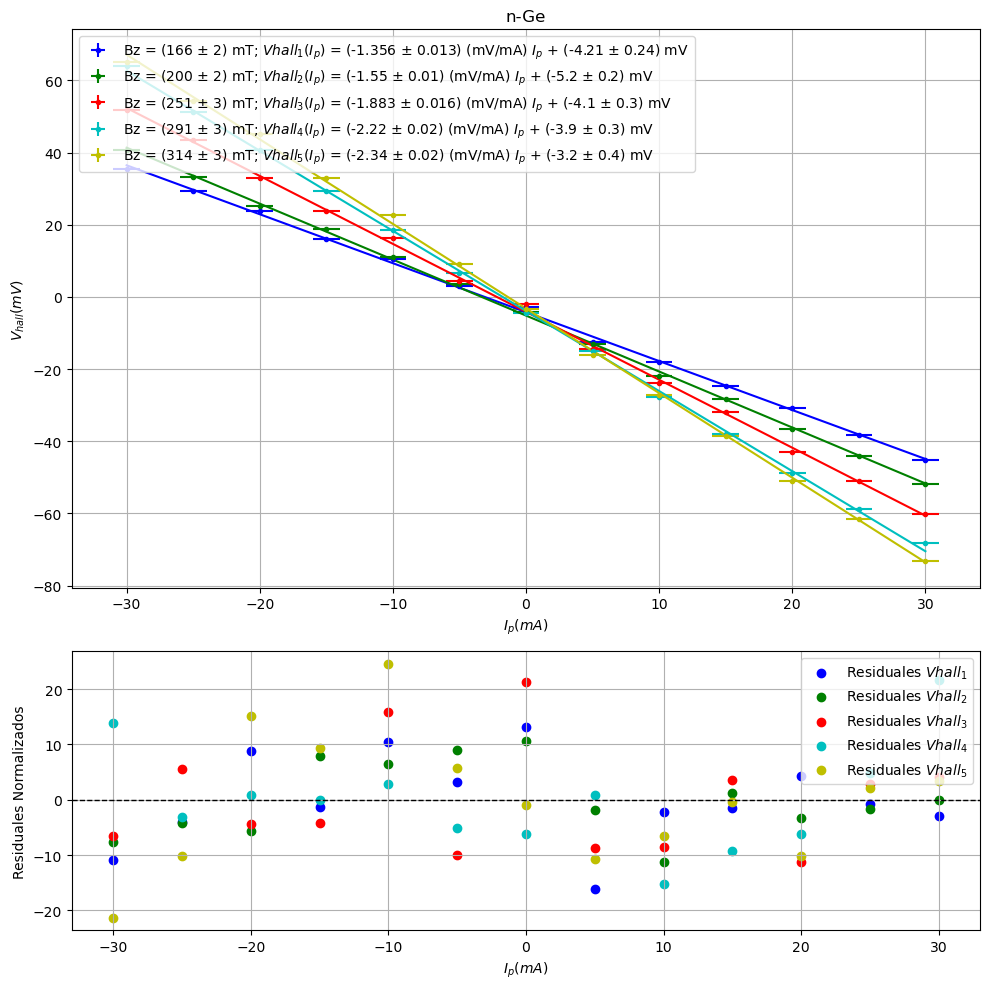

In [18]:
#ACT 2.1

fign, axn = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

#Datos nGe

Vhall1n = -np.array([-35.4, -29.3, -23.8, -16.0, -10.4, -2.9, 2.9, 12.6, 18.0, 24.7, 30.9, 38.2, 45.2]) #0.8 A, 166.92 mT
Vhall2n = -np.array([-40.6, -33.2, -25.3, -18.9, -11.0, -3.5, 4.1, 13.1, 21.8, 28.3, 36.5, 44.1, 51.7]) #0.96 A, 200.5 mT
Vhall3n = -np.array([-51.7, -43.5, -33.1, -23.7, -16.3, -4.3, 2.0, 14.4, 23.8, 32.0, 42.9, 50.9, 60.2]) #1.2 A, 250.86 mT
Vhall4n = -np.array([-64.1, -51.3, -40.6, -29.4, -18.6, -6.7, 4.5, 14.9, 27.6, 38.1, 48.9, 58.9, 68.3]) #1.39 A, 290.74 mT
Vhall5n = -np.array([-65.0, -54.4, -45.2, -32.9, -22.7, -9.1, 3.3, 16.0, 27.3, 38.4, 51.1, 61.6, 73.2]) #1.5 A, 313.82 mT

popt1n, pcov1n = curve_fit(linear_function, Ip1, Vhall1n)
popt2n, pcov2n = curve_fit(linear_function, Ip1, Vhall2n)
popt3n, pcov3n = curve_fit(linear_function, Ip1, Vhall3n)
popt4n, pcov4n = curve_fit(linear_function, Ip1, Vhall4n)
popt5n, pcov5n = curve_fit(linear_function, Ip1, Vhall5n)

slope1n = popt1n[0]
intercept1n = popt1n[1]
slope_std_err1n = np.sqrt(pcov1n[0, 0])
intercept_std_err1n = np.sqrt(pcov1n[1, 1])

slope2n = popt2n[0]
intercept2n = popt2n[1]
slope_std_err2n = np.sqrt(pcov2n[0, 0])
intercept_std_err2n = np.sqrt(pcov2n[1, 1])

slope3n = popt3n[0]
intercept3n = popt3n[1]
slope_std_err3n = np.sqrt(pcov3n[0, 0])
intercept_std_err3n = np.sqrt(pcov3n[1, 1])

slope4n = popt4n[0]
intercept4n = popt4n[1]
slope_std_err4n = np.sqrt(pcov4n[0, 0])
intercept_std_err4n = np.sqrt(pcov4n[1, 1])


slope5n = popt5n[0]
intercept5n = popt5n[1]
slope_std_err5n = np.sqrt(pcov5n[0, 0])
intercept_std_err5n = np.sqrt(pcov5n[1, 1])

axn[0].errorbar(Ip1, Vhall1n, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "b",
             label=f'Bz = (166 ± 2) mT; $Vhall_{1}(I_p)$ = ({slope1n:.3f} ± {slope_std_err1n:.3f}) (mV/mA) $I_p$ + ({intercept1n:.2f} ± {intercept_std_err1n:.2f}) mV')
axn[0].errorbar(Ip1, Vhall2n, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "g",
             label=f'Bz = (200 ± 2) mT; $Vhall_{2}(I_p)$ = ({slope2n:.2f} ± {slope_std_err2n:.2f}) (mV/mA) $I_p$ + ({intercept2n:.1f} ± {intercept_std_err2n:.1f}) mV')
axn[0].errorbar(Ip1, Vhall3n, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "r",
             label=f'Bz = (251 ± 3) mT; $Vhall_{3}(I_p)$ = ({slope3n:.3f} ± {slope_std_err3n:.3f}) (mV/mA) $I_p$ + ({intercept3n:.1f} ± {intercept_std_err3n:.1f}) mV')
axn[0].errorbar(Ip1, Vhall4n, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "c",
             label=f'Bz = (291 ± 3) mT; $Vhall_{4}(I_p)$ = ({slope4n:.2f} ± {slope_std_err4n:.2f}) (mV/mA) $I_p$ + ({intercept4n:.1f} ± {intercept_std_err4n:.1f}) mV')
axn[0].errorbar(Ip1, Vhall5n, xerr = sigma_Ip1,
             yerr = sigma_Vhall, fmt=".", color = "y",
             label=f'Bz = (314 ± 3) mT; $Vhall_{5}(I_p)$ = ({slope5n:.2f} ± {slope_std_err5n:.2f}) (mV/mA) $I_p$ + ({intercept5n:.1f} ± {intercept_std_err5n:.1f}) mV')

axn[0].plot(Ip1, linear_function(Ip1,*popt1n), color="b")
axn[0].plot(Ip1, linear_function(Ip1,*popt2n), color= "g")
axn[0].plot(Ip1, linear_function(Ip1,*popt3n), color = "r")
axn[0].plot(Ip1, linear_function(Ip1,*popt4n), color = "c")
axn[0].plot(Ip1, linear_function(Ip1,*popt5n), color = "y")

axn[0].set_xlabel('$I_p (mA)$')
axn[0].set_ylabel('$V_{hall} (mV)$')
axn[0].legend(loc='upper left')

axn[0].set_title("n-Ge")


residuals1n = (Vhall1n - linear_function(Ip1, *popt1n))/sigma_Vhall
residuals2n = (Vhall2n - linear_function(Ip1, *popt2n))/sigma_Vhall
residuals3n = (Vhall3n - linear_function(Ip1, *popt3n))/sigma_Vhall
residuals4n = (Vhall4n - linear_function(Ip1, *popt4n))/sigma_Vhall
residuals5n = (Vhall5n - linear_function(Ip1, *popt5n))/sigma_Vhall

axn[1].scatter(Ip1, residuals1n, alpha=1, label='Residuales $Vhall_1$', color = "b")
axn[1].scatter(Ip1, residuals2n, alpha=1, label='Residuales $Vhall_2$', color = "g")
axn[1].scatter(Ip1, residuals3n, alpha=1, label='Residuales $Vhall_3$', color = "r")
axn[1].scatter(Ip1, residuals4n, alpha=1, label='Residuales $Vhall_4$', color = "c")
axn[1].scatter(Ip1, residuals5n, alpha=1, label='Residuales $Vhall_5$', color = "y")


axn[1].axhline(0, color='black', linewidth=1, linestyle='--')
axn[1].set_xlabel('$I_p (mA)$')
axn[1].set_ylabel('Residuales Normalizados')
axn[1].legend(loc='upper right')

axn[0].grid(True)
axn[1].grid(True)

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


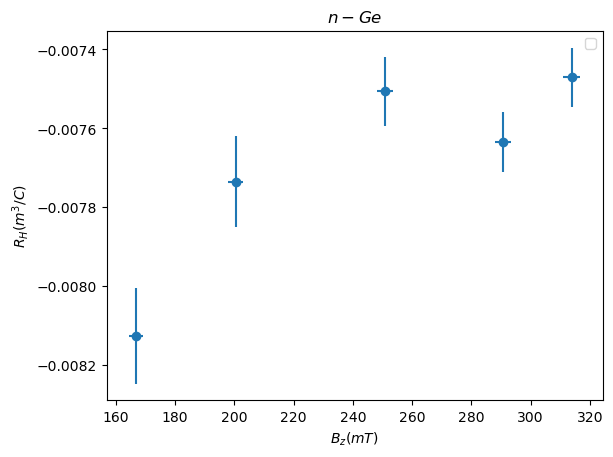

In [19]:
RH1n = slope1n*1e-3/(B1*1e-3)
RH2n = slope2n*1e-3/(B2*1e-3)
RH3n = slope3n*1e-3/(B3*1e-3)
RH4n = slope4n*1e-3/(B4*1e-3)
RH5n = slope5n*1e-3/(B5*1e-3)

sigma_RH1n = sigma_RH(1e-3,slope1n,B1*1e-3,slope_std_err1,sigma_B1*1e-3)
sigma_RH2n = sigma_RH(1e-3,slope2n,B2*1e-3,slope_std_err2,sigma_B2*1e-3)
sigma_RH3n = sigma_RH(1e-3,slope3n,B3*1e-3,slope_std_err3,sigma_B3*1e-3)
sigma_RH4n = sigma_RH(1e-3,slope4n,B4*1e-3,slope_std_err4,sigma_B4*1e-3)
sigma_RH5n = sigma_RH(1e-3,slope5n,B5*1e-3,slope_std_err5,sigma_B5*1e-3)


plt.errorbar(np.array([B1,B2,B3,B4,B5]),np.array([RH1n,RH2n,RH3n,RH4n,RH5n]),
                fmt="o",xerr=np.array([sigma_B1,sigma_B2,sigma_B3,sigma_B4,sigma_B5]),
                yerr = np.array([sigma_RH1n,sigma_RH2n,sigma_RH3n,sigma_RH4n,sigma_RH5n]))

plt.title("$n-Ge$")
plt.xlabel("$B_z (mT)$")
plt.ylabel("$R_H (m^3/C)$")
plt.legend()

In [20]:
print(RH1n, sigma_RH1n)
print(RH2n, sigma_RH2n)
print(RH3n, sigma_RH3n)
print(RH4n, sigma_RH4n)
print(RH5n, sigma_RH5n)

-0.008125831393492221 0.00012036559250480878
-0.007735100039358474 0.00011531707244340836
-0.007505446073286907 8.760699222988928e-05
-0.0076345813877002604 7.524941638082581e-05
-0.00747042392415834 7.53574330842587e-05


In [21]:
(RH1n+RH2n+RH3n+RH4n+RH5n)/5,np.sqrt(sigma_RH1n**2+sigma_RH2n**2+sigma_RH3n**2+sigma_RH4n**2+sigma_RH5n**2)/4

(-0.007694276563599239, 5.408448572038894e-05)

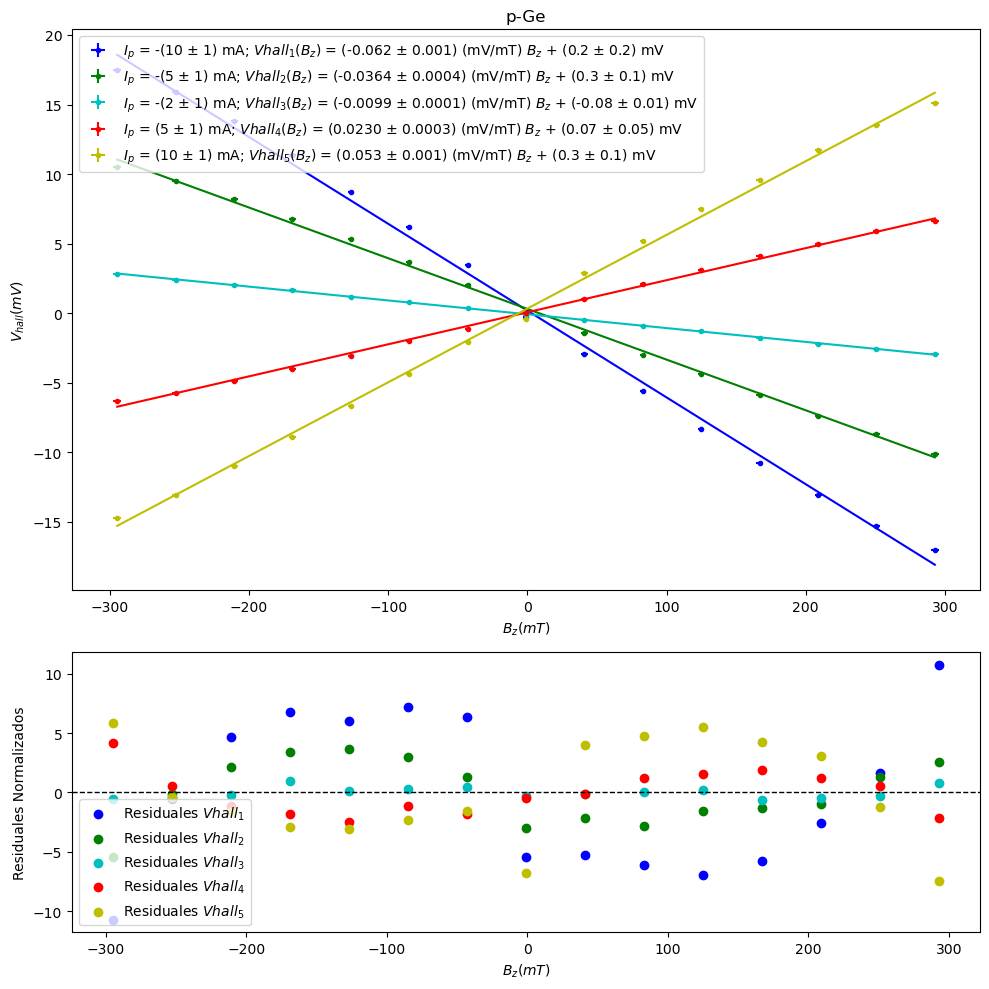

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})
Ip_used = np.array([-10,-5,0,5,10])

Ib1 = np.array([-1.4, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4])
Bz1 = linear_function(Ib1,*popt)

sigma_Ib1 = np.array([0.01]*len(Ib1))
sigma_Bz1 = sigma_Bz(Ib1,slope,intercept,sigma_Ib1,slope_std_err,intercept_std_err)


# Datos p-Ge

Vhall12 = -np.array([-17.5, -15.9, -13.8, -11.4, -8.7, -6.2, -3.5, 0.3, 2.9, 5.6, 8.3, 10.8, 13.1, 15.3, 17])
Vhall22 = -np.array([-10.5, -9.5, -8.2, -6.8, -5.3, -3.7, -2, -0.04, 1.4, 3, 4.4, 5.9, 7.4, 8.7, 10.1])
Vhall32 = np.array([2.8, 2.4, 2.0, 1.7, 1.2, 0.8, 0.4, -0.1, -0.5, -0.9, -1.3, -1.8, -2.2, -2.6, -2.9])
Vhall42 = -np.array([6.3, 5.7, 4.9, 4.0, 3.1, 2.0, 1.1, 0.0, -1.0, -2.1, -3.1, -4.1, -5.0, -5.9, -6.6])
Vhall52 = -np.array([14.7, 13.1, 11.0, 8.9, 6.7, 4.4, 2.1, 0.4, -2.9, -5.2, -7.5, -9.6, -11.7, -13.5, -15.1])

sigma_Vhall1 = np.array([0.1]*len(Vhall12))

popt12, pcov12 = curve_fit(linear_function, Bz1, Vhall12)
popt22, pcov22 = curve_fit(linear_function, Bz1, Vhall22)
popt32, pcov32 = curve_fit(linear_function, Bz1, Vhall32)
popt42, pcov42 = curve_fit(linear_function, Bz1, Vhall42)
popt52, pcov52 = curve_fit(linear_function, Bz1, Vhall52)

slope12 = popt12[0]
intercept12 = popt12[1]
slope_std_err12 = np.sqrt(pcov12[0, 0])
intercept_std_err12 = np.sqrt(pcov12[1, 1])

slope22 = popt22[0]
intercept22 = popt22[1]
slope_std_err22 = np.sqrt(pcov22[0, 0])
intercept_std_err22 = np.sqrt(pcov22[1, 1])

slope32 = popt32[0]
intercept32 = popt32[1]
slope_std_err32 = np.sqrt(pcov32[0, 0])
intercept_std_err32 = np.sqrt(pcov32[1, 1])

slope42 = popt42[0]
intercept42 = popt42[1]
slope_std_err42 = np.sqrt(pcov42[0, 0])
intercept_std_err42 = np.sqrt(pcov42[1, 1])


slope52 = popt52[0]
intercept52 = popt52[1]
slope_std_err52 = np.sqrt(pcov52[0, 0])
intercept_std_err52 = np.sqrt(pcov52[1, 1])

ax1.errorbar(Bz1, Vhall12, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "b",
             label=f'$I_p$ = -(10 ± 1) mA; $Vhall_{1}(B_z)$ = ({slope12:.3f} ± {slope_std_err12:.3f}) (mV/mT) $B_z$ + ({intercept12:.1f} ± {intercept_std_err12:.1f}) mV')
ax1.errorbar(Bz1, Vhall22, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "g",
             label=f'$I_p$ = -(5 ± 1) mA; $Vhall_{2}(B_z)$ = ({slope22:.4f} ± {slope_std_err22:.4f}) (mV/mT) $B_z$ + ({intercept22:.1f} ± {intercept_std_err22:.1f}) mV')
ax1.errorbar(Bz1, Vhall32, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "c",
             label=f'$I_p$ = -(2 ± 1) mA; $Vhall_{3}(B_z)$ = ({slope32:.4f} ± {slope_std_err32:.4f}) (mV/mT) $B_z$ + ({intercept32:.2f} ± {intercept_std_err32:.2f}) mV')
ax1.errorbar(Bz1, Vhall42, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "r",
             label=f'$I_p$ = (5 ± 1) mA; $Vhall_{4}(B_z)$ = ({slope42:.4f} ± {slope_std_err42:.4f}) (mV/mT) $B_z$ + ({intercept42:.2f} ± {intercept_std_err42:.2f}) mV')
ax1.errorbar(Bz1, Vhall52, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "y",
             label=f'$I_p$ = (10 ± 1) mA; $Vhall_{5}(B_z)$ = ({slope52:.3f} ± {slope_std_err52:.3f}) (mV/mT) $B_z$ + ({intercept52:.1f} ± {intercept_std_err52:.1f}) mV')

ax1.plot(Bz1, linear_function(Bz1,*popt12), color = "b")
ax1.plot(Bz1, linear_function(Bz1,*popt22), color = "g")
ax1.plot(Bz1, linear_function(Bz1,*popt32), color = "c")
ax1.plot(Bz1, linear_function(Bz1,*popt42), color = "r")
ax1.plot(Bz1, linear_function(Bz1,*popt52), color = "y")

ax1.set_xlabel('$B_z (mT)$')
ax1.set_ylabel('$V_{hall} (mV)$')
ax1.legend(loc='upper left')

ax1.set_title("p-Ge")


residuals12 = (Vhall12 - linear_function(Bz1, *popt12))/sigma_Vhall1
residuals22 = (Vhall22 - linear_function(Bz1, *popt22))/sigma_Vhall1
residuals32 = (Vhall32 - linear_function(Bz1, *popt32))/sigma_Vhall1
residuals42 = (Vhall42 - linear_function(Bz1, *popt42))/sigma_Vhall1
residuals52 = (Vhall52 - linear_function(Bz1, *popt52))/sigma_Vhall1

ax2.scatter(Bz1, residuals12, alpha=1, label='Residuales $Vhall_1$', color = "b")
ax2.scatter(Bz1, residuals22, alpha=1, label='Residuales $Vhall_2$', color = "g")
ax2.scatter(Bz1, residuals32, alpha=1, label='Residuales $Vhall_3$', color = "c")
ax2.scatter(Bz1, residuals42, alpha=1, label='Residuales $Vhall_4$', color = "r")
ax2.scatter(Bz1, residuals52, alpha=1, label='Residuales $Vhall_5$', color = "y")


ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('$B_z (mT)$')
ax2.set_ylabel('Residuales Normalizados')
ax2.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [23]:
RH12 = slope12*1e-3/(-10*1e-3)
RH22 = slope22*1e-3/(-5*1e-3)
RH32 = slope32*1e-3/(-2*1e-3)
RH42 = slope42*1e-3/(5*1e-3)
RH52 = slope52*1e-3/(10*1e-3)

sigma_RH12 = sigma_RH(1e-3,slope12,-10*1e-3,slope_std_err1,1*1e-3)
sigma_RH22 = sigma_RH(1e-3,slope22,-5*1e-3,slope_std_err2,1*1e-3)
sigma_RH32 = sigma_RH(1e-3,slope32,2*1e-3,slope_std_err3,1*1e-3)
sigma_RH42 = sigma_RH(1e-3,slope42,5*1e-3,slope_std_err4,1*1e-3)
sigma_RH52 = sigma_RH(1e-3,slope52,10*1e-3,slope_std_err5,1*1e-3)

print(RH12, sigma_RH12)
print(RH22, sigma_RH22)
print(RH32, sigma_RH32)
print(RH42, sigma_RH42)
print(RH52, sigma_RH52)

0.006237133270000947 0.0007705146080387263
0.007285448167694567 0.002932092001671128
0.004965030373403033 0.005304774176611589
0.004606799389851443 0.0013806911838249408
0.0052968833035433914 0.0011292384652156302


In [24]:
(RH12+RH22+RH32+RH42+RH52)/5,np.sqrt(sigma_RH12**2+sigma_RH22**2+sigma_RH32**2+sigma_RH42**2+sigma_RH52**2)/5

(0.005678258900898675, 0.001272996040665084)

In [25]:
VLp = np.array([-0.418,-0.231,-0.143,0.154,0.307])


cond1p = l*(-10*1e-3)/(VLp[0]*At)
cond2p = l*(-5*1e-3)/(VLp[1]*At)
cond3p = l*(-2*1e-3)/(VLp[2]*At)
cond4p = l*(5*1e-3)/(VLp[3]*At)
cond5p = l*(10*1e-3)/(VLp[4]*At)

sigma_cond1p = (l*(-10*1e-3)/(At))*0.001/VLp[0]**2
sigma_cond2p = (l*(-5*1e-3)/(At))*0.001/VLp[1]**2
sigma_cond3p = (l*(-2*1e-3)/(At))*0.001/VLp[2]**2
sigma_cond4p = (l*(5*1e-3)/(At))*0.001/VLp[3]**2
sigma_cond5p = (l*(10*1e-3)/(At))*0.001/VLp[4]**2

mu1p = np.abs(RH12)*cond1p
mu2p = np.abs(RH22)*cond2p
mu3p = np.abs(RH32)*cond3p
mu4p = np.abs(RH42)*cond4p
mu5p = np.abs(RH52)*cond5p

sigma_mu1p = np.sqrt(sigma_RH12**2*cond1p + sigma_cond1p**2*RH12**2)
sigma_mu2p = np.sqrt(sigma_RH22**2*cond2p + sigma_cond2p**2*RH22**2)
sigma_mu3p = np.sqrt(sigma_RH32**2*cond3p + sigma_cond3p**2*RH32**2)
sigma_mu4p = np.sqrt(sigma_RH42**2*cond4p + sigma_cond4p**2*RH42**2)
sigma_mu5p = np.sqrt(sigma_RH52**2*cond5p + sigma_cond5p**2*RH52**2)

e = 1.6e-19

n1p = 1/(RH12*e)
n2p = 1/(RH22*e)
n3p = 1/(RH32*e)
n4p = 1/(RH42*e)
n5p = 1/(RH52*e)

sigma_n1p = (1/e)*sigma_RH12/(RH12)**2
sigma_n2p = (1/e)*sigma_RH22/(RH22)**2
sigma_n3p = (1/e)*sigma_RH32/(RH32)**2
sigma_n4p = (1/e)*sigma_RH42/(RH42)**2
sigma_n5p = (1/e)*sigma_RH52/(RH52)**2


print(cond1p, cond2p, cond3p, cond4p, cond5p)
print(mu1p, mu2p, mu3p, mu4p, mu5p)
print(n1p, n2p, n3p, n4p, n5p)

47.84688995215311 43.290043290043286 27.972027972027973 64.93506493506493 65.14657980456026
0.29842742918664816 0.31538736656686434 0.13888196848679812 0.29914281752282096 0.34507383084973237
1.0020629236929952e+21 8.578744719801873e+20 1.2588039810351149e+21 1.3566902899588918e+21 1.1799391532411172e+21


In [26]:
(cond1p+ cond2p+ cond3p+ cond4p+ cond5p)/5, np.sqrt(sigma_cond1p**2+sigma_cond2p**2+sigma_cond3p**2 + sigma_cond4p**2 + sigma_cond5p**2)/5

(49.83812119076991, 0.11123120454746176)

In [27]:
(mu1p+ mu2p+mu3p+mu4p+mu5p)/5, np.sqrt(sigma_mu1p**2+sigma_mu2p**2+sigma_mu3p**2+sigma_mu4p**2+sigma_mu5p**2)/5

(0.2793826825225728, 0.007491173258293798)

In [28]:
np.mean([n1p, n2p, n3p, n4p, n5p]), np.sqrt(sigma_n1p**2+sigma_n2p**2+sigma_n3p**2+sigma_n4p**2+sigma_n5p**2)/5

(1.1310741639816614e+21, 2.9475430505283433e+20)

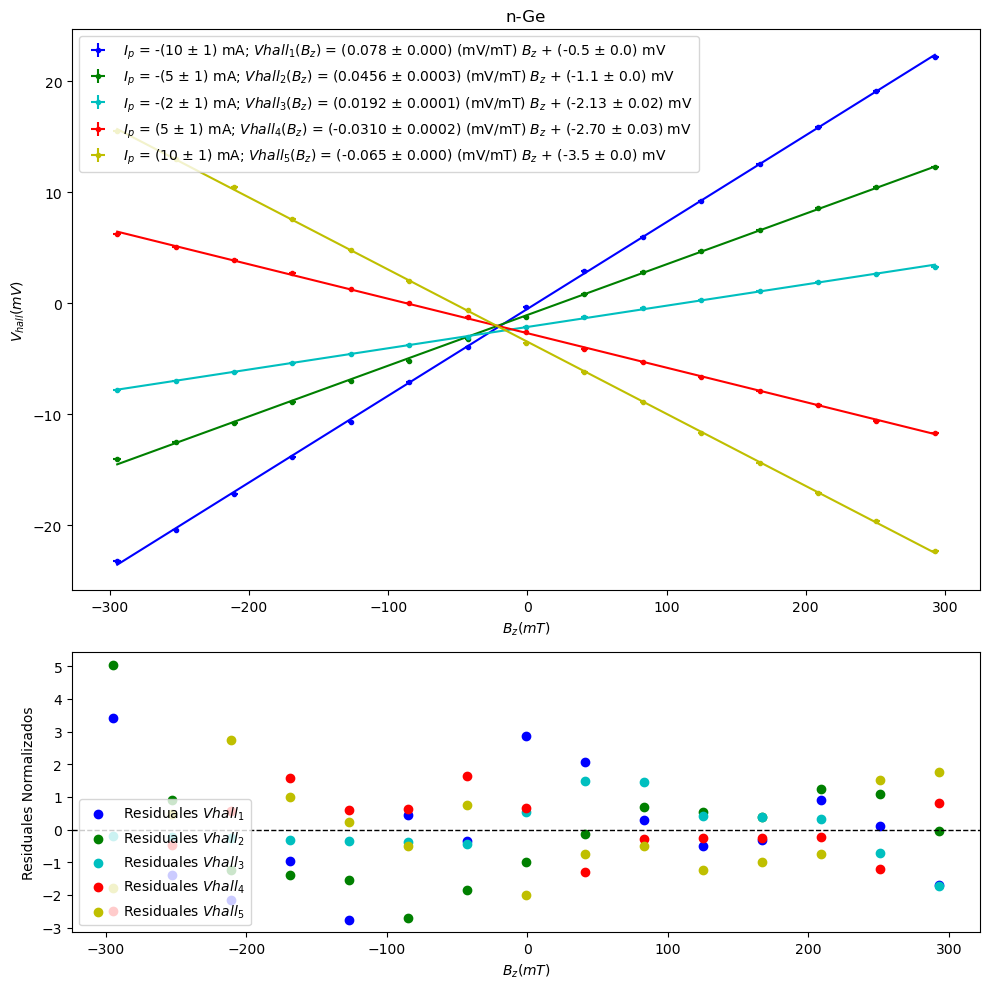

In [29]:
#ACT 2.2

# Datos n-Ge

fign, (ax1n, ax2n) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

Vhall12n = -np.array([23.2, 20.4, 17.2, 13.8, 10.7, 7.1, 3.9, 0.3, -2.9, -6.0, -9.2, -12.5, -15.9, -19.1, -22.2])
Vhall22n = -np.array([14.0, 12.5, 10.8, 8.9, 7.0, 5.2, 3.2, 1.2, -0.8, -2.8, -4.7, -6.6, -8.6, -10.5, -12.3])
Vhall32n = -np.array([7.8, 7.0, 6.2, 5.4, 4.6, 3.8, 3.0, 2.1, 1.2, 0.4, -0.3, -1.1, -1.9, -2.6, -3.3])
Vhall42n = -np.array([-6.2, -5.1, -3.9, -2.7, -1.3, 0.0, 1.2, 2.6, 4.1, 5.3, 6.6, 7.9, 9.2, 10.6, 11.7])
Vhall52n = -np.array([-15.5, -13, -10.5, -7.6, -4.8, -2, 0.6, 3.6, 6.2, 8.9, 11.7, 14.4, 17.1, 19.6, 22.3])

sigma_Vhall1 = np.array([0.1]*len(Vhall12))

popt12n, pcov12n = curve_fit(linear_function, Bz1, Vhall12n)
popt22n, pcov22n = curve_fit(linear_function, Bz1, Vhall22n)
popt32n, pcov32n = curve_fit(linear_function, Bz1, Vhall32n)
popt42n, pcov42n = curve_fit(linear_function, Bz1, Vhall42n)
popt52n, pcov52n = curve_fit(linear_function, Bz1, Vhall52n)

slope12n = popt12n[0]
intercept12n = popt12n[1]
slope_std_err12n = np.sqrt(pcov12n[0, 0])
intercept_std_err12n = np.sqrt(pcov12n[1, 1])

slope22n = popt22n[0]
intercept22n = popt22n[1]
slope_std_err22n = np.sqrt(pcov22n[0, 0])
intercept_std_err22n = np.sqrt(pcov22n[1, 1])

slope32n = popt32n[0]
intercept32n = popt32n[1]
slope_std_err32n = np.sqrt(pcov32n[0, 0])
intercept_std_err32n = np.sqrt(pcov32n[1, 1])

slope42n = popt42n[0]
intercept42n = popt42n[1]
slope_std_err42n = np.sqrt(pcov42n[0, 0])
intercept_std_err42n = np.sqrt(pcov42n[1, 1])


slope52n = popt52n[0]
intercept52n = popt52n[1]
slope_std_err52n = np.sqrt(pcov52n[0, 0])
intercept_std_err52n = np.sqrt(pcov52n[1, 1])

ax1n.errorbar(Bz1, Vhall12n, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "b",
             label=f'$I_p$ = -(10 ± 1) mA; $Vhall_{1}(B_z)$ = ({slope12n:.3f} ± {slope_std_err12n:.3f}) (mV/mT) $B_z$ + ({intercept12n:.1f} ± {intercept_std_err12n:.1f}) mV')
ax1n.errorbar(Bz1, Vhall22n, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "g",
             label=f'$I_p$ = -(5 ± 1) mA; $Vhall_{2}(B_z)$ = ({slope22n:.4f} ± {slope_std_err22n:.4f}) (mV/mT) $B_z$ + ({intercept22n:.1f} ± {intercept_std_err22n:.1f}) mV')
ax1n.errorbar(Bz1, Vhall32n, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "c",
             label=f'$I_p$ = -(2 ± 1) mA; $Vhall_{3}(B_z)$ = ({slope32n:.4f} ± {slope_std_err32n:.4f}) (mV/mT) $B_z$ + ({intercept32n:.2f} ± {intercept_std_err32n:.2f}) mV')
ax1n.errorbar(Bz1, Vhall42n, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "r",
             label=f'$I_p$ = (5 ± 1) mA; $Vhall_{4}(B_z)$ = ({slope42n:.4f} ± {slope_std_err42n:.4f}) (mV/mT) $B_z$ + ({intercept42n:.2f} ± {intercept_std_err42n:.2f}) mV')
ax1n.errorbar(Bz1, Vhall52n, xerr = sigma_Bz1,
             yerr = sigma_Vhall1, fmt=".", color = "y",
             label=f'$I_p$ = (10 ± 1) mA; $Vhall_{5}(B_z)$ = ({slope52n:.3f} ± {slope_std_err52n:.3f}) (mV/mT) $B_z$ + ({intercept52n:.1f} ± {intercept_std_err52n:.1f}) mV')

ax1n.plot(Bz1, linear_function(Bz1,*popt12n), color = "b")
ax1n.plot(Bz1, linear_function(Bz1,*popt22n), color = "g")
ax1n.plot(Bz1, linear_function(Bz1,*popt32n), color = "c")
ax1n.plot(Bz1, linear_function(Bz1,*popt42n), color = "r")
ax1n.plot(Bz1, linear_function(Bz1,*popt52n), color = "y")

ax1n.set_xlabel('$B_z (mT)$')
ax1n.set_ylabel('$V_{hall} (mV)$')
ax1n.legend(loc='upper left')
ax1n.set_title("n-Ge")

residuals12n = (Vhall12n - linear_function(Bz1, *popt12n))/sigma_Vhall1
residuals22n = (Vhall22n - linear_function(Bz1, *popt22n))/sigma_Vhall1
residuals32n = (Vhall32n - linear_function(Bz1, *popt32n))/sigma_Vhall1
residuals42n = (Vhall42n - linear_function(Bz1, *popt42n))/sigma_Vhall1
residuals52n = (Vhall52n - linear_function(Bz1, *popt52n))/sigma_Vhall1

ax2n.scatter(Bz1, residuals12n, alpha=1, label='Residuales $Vhall_1$', color = "b")
ax2n.scatter(Bz1, residuals22n, alpha=1, label='Residuales $Vhall_2$', color = "g")
ax2n.scatter(Bz1, residuals32n, alpha=1, label='Residuales $Vhall_3$', color = "c")
ax2n.scatter(Bz1, residuals42n, alpha=1, label='Residuales $Vhall_4$', color = "r")
ax2n.scatter(Bz1, residuals52n, alpha=1, label='Residuales $Vhall_5$', color = "y")


ax2n.axhline(0, color='black', linewidth=1, linestyle='--')
ax2n.set_xlabel('$B_z (mT)$')
ax2n.set_ylabel('Residuales Normalizados')
ax2n.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [30]:
RH12n = slope12n*1e-3/(-10*1e-3)
RH22n = slope22n*1e-3/(-5*1e-3)
RH32n = slope32n*1e-3/(-2*1e-3)
RH42n = slope42n*1e-3/(5*1e-3)
RH52n = slope52n*1e-3/(10*1e-3)

sigma_RH12n = sigma_RH(1e-3,slope12n,-10*1e-3,slope_std_err1n,1*1e-3)
sigma_RH22n = sigma_RH(1e-3,slope22n,-5*1e-3,slope_std_err2n,1*1e-3)
sigma_RH32n = sigma_RH(1e-3,slope32n,-2*1e-3,slope_std_err3n,1*1e-3)
sigma_RH42n = sigma_RH(1e-3,slope42n,5*1e-3,slope_std_err4n,1*1e-3)
sigma_RH52n = sigma_RH(1e-3,slope52n,10*1e-3,slope_std_err5n,1*1e-3)

print(RH12n, sigma_RH12n)
print(RH22n, sigma_RH22n)
print(RH32n, sigma_RH32n)
print(RH42n, sigma_RH42n)
print(RH52n, sigma_RH52n)

-0.00781300923520246 0.001485501253103792
-0.009125104665505868 0.002784256132147477
-0.009576935192974662 0.009170492001444194
-0.006204798883151271 0.0032484014394811847
-0.006493255660352153 0.0019981167218379972


In [31]:
(RH12n+RH22n+RH32n+RH42n+RH52n)/5,np.sqrt(sigma_RH12n**2+sigma_RH22n**2+sigma_RH32n**2+sigma_RH42n**2+sigma_RH52n**2)/5

(-0.007842620727437282, 0.0020842389697636665)

In [32]:
VLn = np.array([-0.470,-0.268, -0.122, 0.193, 0.393])
cond1n = l*(-10*1e-3)/(VLn[0]*At)
cond2n = l*(-5*1e-3)/(VLn[1]*At)
cond3n = l*(-2*1e-3)/(VLn[2]*At)
cond4n = l*(5*1e-3)/(VLn[3]*At)
cond5n = l*(10*1e-3)/(VLn[4]*At)

mu1n = np.abs(RH12n)*cond1n
mu2n = np.abs(RH22n)*cond2n
mu3n = np.abs(RH32n)*cond3n
mu4n = np.abs(RH42n)*cond4n
mu5n = np.abs(RH52n)*cond5n

e = 1.6e-19

n1n = 1/(RH12n*e)
n2n = 1/(RH22n*e)
n3n = 1/(RH32n*e)
n4n = 1/(RH42n*e)
n5n = 1/(RH52n*e)


print(cond1n, cond2n, cond3n, cond4n, cond5n)
print(mu1n, mu2n, mu3n, mu4n, mu5n)
print(n1n, n2n, n3n, n4n, n5n)

42.55319148936171 37.3134328358209 32.78688524590164 51.81347150259067 50.89058524173028
0.3324684780937217 0.3404889800561891 0.3139978751794971 0.3214921701114648 0.33044558067949886
-7.999478577140122e+20 -6.849236506432466e+20 -6.526096161311401e+20 -1.0072848641349955e+21 -9.625371811805482e+20


In [33]:
np.mean([n1n, n2n, n3n, n4n, n5n]), np.mean([cond1n, cond2n, cond3n, cond4n, cond5n]), np.mean([mu1n, mu2n, mu3n, mu4n, mu5n])

(-8.214606339607885e+20, 43.07151326308103, 0.3277786168240743)

#ACT 3 p-Ge

In [34]:
Ib1p = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5])
Bz1p = linear_function(Ib1p,*popt)

sigma_Bz1p = sigma_Bz(Ib1p,slope,intercept,0.01,slope_std_err, intercept_std_err)

VLp2 = np.array([0.988, 0.989, 0.99, 0.991, 0.993, 
                0.994, 0.996, 0.999, 1.001, 1.004, 1.007, 
                1.01, 1.013, 1.016, 1.019])

R0p = 0.988/(30*1e-3)
sigma_R0p = np.sqrt((0.001**2*(30*1e-3)**2 + (1*1e-3)**2*0.988**2)/(30*1e-3)**4)

Rmp = VLp2/(30*1e-3)
sigma_Rmp = np.sqrt((0.001**2*(30*1e-3)**2 + (1*1e-3)**2*VLp2**2)/(30*1e-3)**4)

coef_values1p = (Rmp - R0p) / R0p

sigma_coef_values1p = np.sqrt( ( sigma_Rmp**2*R0p**2 + sigma_R0p**2*Rmp**2) / (R0p**4) )

Rmp, sigma_Rmp, R0p, sigma_R0p

(array([32.93333333, 32.96666667, 33.        , 33.03333333, 33.1       ,
        33.13333333, 33.2       , 33.3       , 33.36666667, 33.46666667,
        33.56666667, 33.66666667, 33.76666667, 33.86666667, 33.96666667]),
 array([1.09828373, 1.09939433, 1.10050493, 1.10161554, 1.10383674,
        1.10494735, 1.10716856, 1.11050039, 1.11272161, 1.11605345,
        1.1193853 , 1.12271716, 1.12604903, 1.12938091, 1.13271279]),
 32.93333333333334,
 1.0982837340568363)

In [35]:
def PowerLaw(X, a, b, c):
    return a*X**b+ c

In [36]:
poptp, pcovp = curve_fit(PowerLaw, Bz1p, coef_values1p)

In [37]:
poptp, np.sqrt(np.diag(pcovp))

(array([ 2.28532901e-06,  1.66174160e+00, -3.30939981e-04]),
 array([5.58276824e-07, 4.21375481e-02, 2.64519697e-04]))

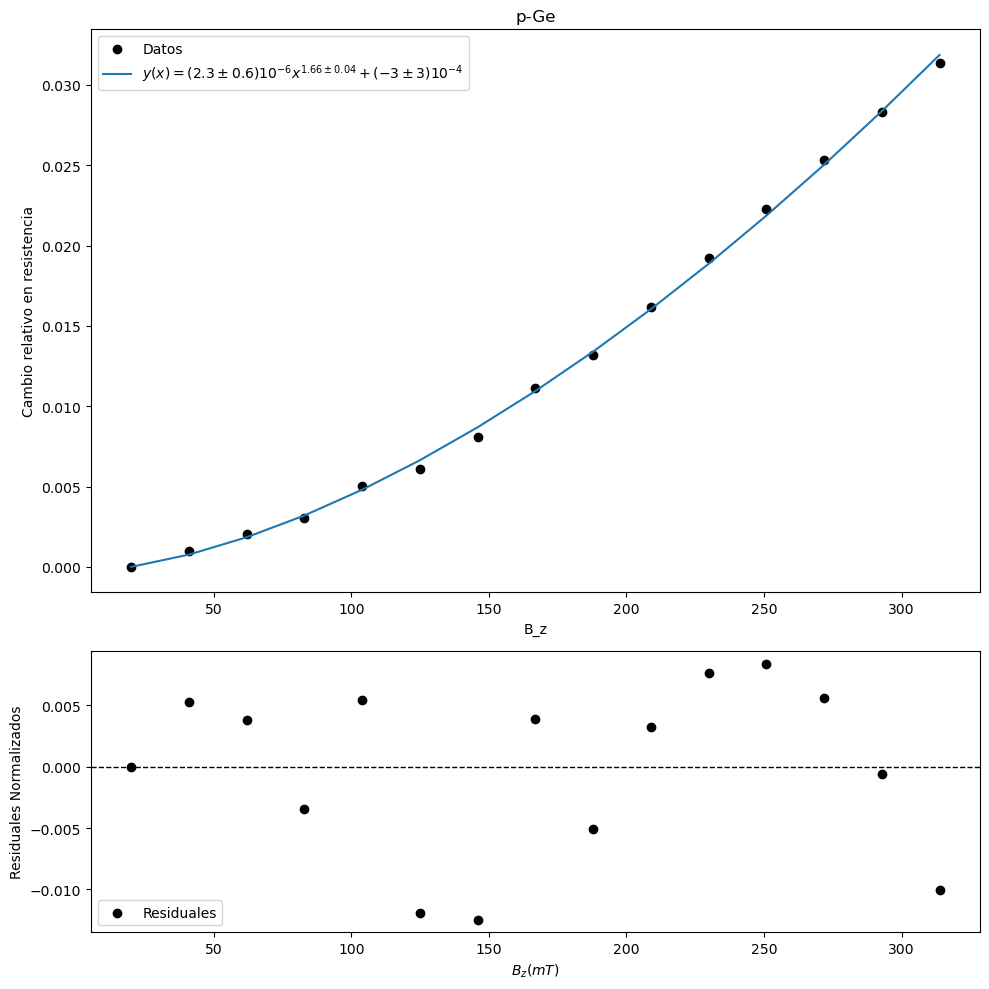

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

ax[0].scatter(Bz1p,coef_values1p,label="Datos",color="k")
ax[0].plot(Bz1p, PowerLaw(Bz1p,*poptp), label="$y(x) = (2.3 \pm 0.6 )10^{-6} x^{1.66\pm0.04} + (-3 \pm 3)10^{-4}$")
ax[0].set_xlabel("B_z")
ax[0].set_ylabel("Cambio relativo en resistencia")
ax[0].set_title("p-Ge")
ax[0].legend()

residuals_polip = (coef_values1p - PowerLaw(Bz1p,*poptp))/sigma_coef_values1p

ax[1].scatter(Bz1p, residuals_polip, alpha=1, label='Residuales', color = "k")
ax[1].axhline(0, color='black', linewidth=1, linestyle='--')
ax[1].set_xlabel('$B_z (mT)$')
ax[1].set_ylabel('Residuales Normalizados')
ax[1].legend(loc='lower left')


plt.tight_layout()
plt.show()

In [39]:
Ib1n = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5])
Bz1n = linear_function(Ib1n,*popt)

VLn2 = np.array([1.281, 1.282, 1.283, 1.284,
    1.286, 1.287, 1.289, 1.294, 1.296,
    1.299, 1.302, 1.305, 1.308, 1.31,
    1.312])

sigma_Bz1n = sigma_Bz(Ib1n,slope,intercept,0.01,slope_std_err, intercept_std_err)

R0n = 1.281/(30*1e-3)
sigma_R0n = np.sqrt((0.001**2*(30*1e-3)**2 + (1*1e-3)**2*1.281**2)/(30*1e-3)**4)

Rmn = VLn2/(30*1e-3)
sigma_Rmn = np.sqrt((0.001**2*(30*1e-3)**2 + (1*1e-3)**2*VLn2**2)/(30*1e-3)**4)

coef_values1n = (Rmn - R0n) / R0n
sigma_coef_values1n = np.sqrt( ( sigma_Rmp**2*R0p**2 + sigma_R0p**2*Rmp**2) / (R0p**4) )

In [40]:
poptn, pcovn = curve_fit(PowerLaw, Bz1n, coef_values1n)
poptn, np.sqrt(np.diag(pcovn))

(array([ 5.70106094e-06,  1.46807858e+00, -9.84527902e-04]),
 array([3.50581330e-06, 1.05459377e-01, 6.54413708e-04]))

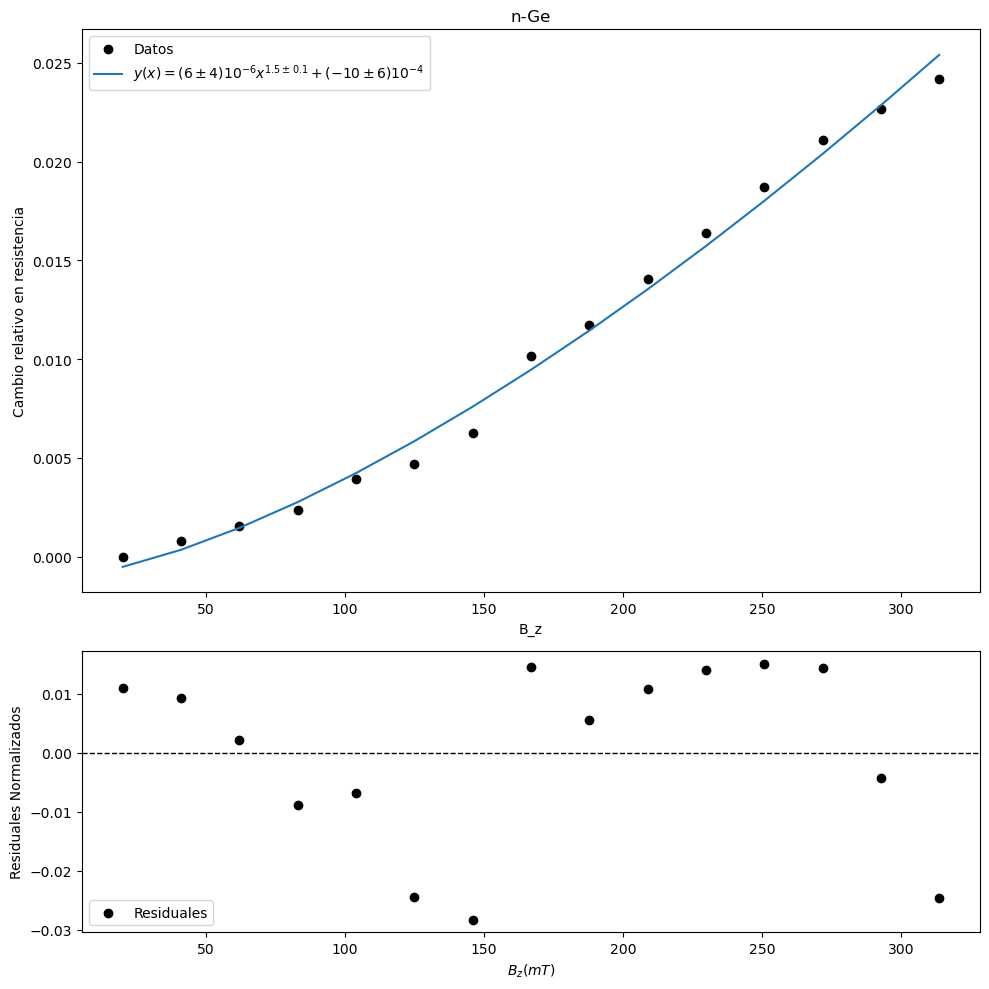

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

ax[0].scatter(Bz1n,coef_values1n,label="Datos",color="k")
ax[0].plot(Bz1n, PowerLaw(Bz1n,*poptn), label="$y(x) = (6 \pm 4 )10^{-6} x^{1.5\pm0.1} + (-10 \pm 6)10^{-4}$")
ax[0].set_xlabel("B_z")
ax[0].set_ylabel("Cambio relativo en resistencia")
ax[0].set_title("n-Ge")
ax[0].legend()

residuals_polin = (coef_values1n - PowerLaw(Bz1n,*poptn))/sigma_coef_values1n

ax[1].scatter(Bz1n, residuals_polin, alpha=1, label='Residuales', color = "k")
ax[1].axhline(0, color='black', linewidth=1, linestyle='--')
ax[1].set_xlabel('$B_z (mT)$')
ax[1].set_ylabel('Residuales Normalizados')
ax[1].legend(loc='lower left')


plt.tight_layout()
plt.show()

In [266]:
#Actividad 4
#4.1 p-Ge

temp1p = np.array([25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 
                45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 
                65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 
                85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 
                105, 107, 109, 111, 113, 115, 117, 119, 121, 
                123, 125, 127, 129, 131]) + 273.15

VL1p = np.array([0.986, 0.990, 1.001, 1.013, 1.022, 1.037, 
             1.048, 1.066, 1.078, 1.090, 1.109, 1.121, 
             1.133, 1.152, 1.174, 1.182, 1.199, 1.210, 
             1.225, 1.235, 1.249, 1.262, 1.270, 1.283, 
             1.290, 1.297, 1.301, 1.303, 1.303, 1.300, 
             1.294, 1.280, 1.270, 1.253, 1.234, 1.207, 
             1.183, 1.157, 1.117, 1.076, 1.041, 1.000, 
             0.954, 0.915, 0.878, 0.837, 0.777, 0.743, 
             0.703, 0.674, 0.631, 0.588, 0.556, 0.524])

R1p = VL1p / (30*1e-3)

sigma_R1p = np.sqrt((0.001**2*(30*1e-3)**2 + (1*1e-3)**2*VL1p**2)/(30*1e-3)**4)

log_sigma_T1p = np.log(l/(R1p*At))

sigma_log_sigma_T1p = np.log(l/At)*sigma_R1p/R1p

In [267]:
popt_fermip1, pcov_fermip1 = curve_fit(linear_function, 1/temp1p[np.argmax(VL1p)+15:], log_sigma_T1p[np.argmax(VL1p)+15:])
popt_fermip1

array([-4256.38143189,    15.25445576])

In [268]:
4256.38143189*8.61733326e-5

0.3667865728027212

In [269]:
popt_inc_fermip1 = np.sqrt(np.diag(pcov_fermip1))
popt_inc_fermip1

array([96.26381453,  0.24496598])

In [270]:
96.26381453*8.61733326e-5

0.008295373706838402

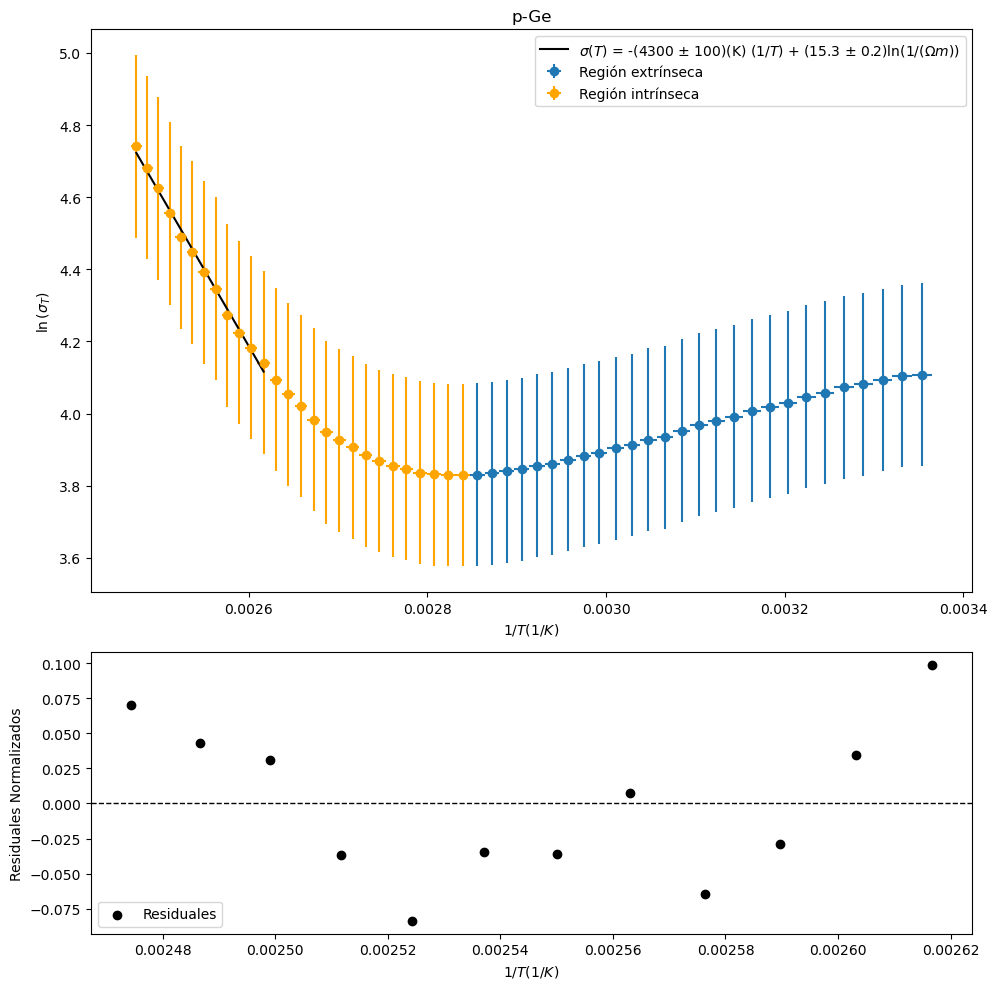

In [271]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

ax[0].errorbar(1/temp1p[:np.argmax(VL1p)],log_sigma_T1p[:np.argmax(VL1p)],label="Región extrínseca",fmt="o",
    xerr=1/temp1p[:np.argmax(VL1p)]**2, yerr=sigma_log_sigma_T1p[:np.argmax(VL1p)])
ax[0].errorbar(1/temp1p[np.argmax(VL1p):],log_sigma_T1p[np.argmax(VL1p):], label="Región intrínseca",fmt="o",color="orange",
    xerr=1/temp1p[np.argmax(VL1p):]**2, yerr=sigma_log_sigma_T1p[np.argmax(VL1p):])
ax[0].plot(1/temp1p[np.argmax(VL1p)+15:], linear_function(1/temp1p[np.argmax(VL1p)+15:],*popt_fermip1),color="black",
label=f'$\sigma(T)$ = -(4300 ± 100)(K) $(1/T)$ + ({popt_fermip1[1]:.1f} ± {popt_inc_fermip1[1]:.1f})$\ln(1/(\Omega m))$')
ax[0].set_title("p-Ge")
ax[0].set_xlabel("$1/T (1/K)$")
ax[0].set_ylabel("$\ln{(\sigma_T)}$")
ax[0].legend()

Residualsfermip = (log_sigma_T1p[np.argmax(VL1p)+15:] - linear_function(1/temp1p[np.argmax(VL1p)+15:],*popt_fermip1))/sigma_log_sigma_T1p[np.argmax(VL1p)+15:]

ax[1].scatter(1/temp1p[np.argmax(VL1p)+15:], Residualsfermip, alpha=1, label='Residuales', color = "k")
ax[1].axhline(0, color='black', linewidth=1, linestyle='--')
ax[1].set_xlabel('$1/T (1/K)$')
ax[1].set_ylabel('Residuales Normalizados')
ax[1].legend(loc='lower left')


plt.tight_layout()
plt.show()

In [272]:
#4.1 p-Ge

temp1n = np.array([31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 
                63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 
                95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 
                121, 123, 125, 127, 129]) + 273.15

VL1n = np.array([1.228, 1.331, 1.321, 1.385, 1.389, 1.366, 1.376, 1.398, 1.417, 1.413, 
             1.432, 1.459, 1.399, 1.395, 1.389, 1.372, 1.376, 1.385, 1.374, 1.354, 
             1.345, 1.342, 1.338, 1.337, 1.321, 1.306, 1.295, 1.289, 1.283, 1.263, 
             1.248, 1.231, 1.217, 1.198, 1.165, 1.131, 1.093, 1.064, 1.036, 1.0, 
             0.974, 0.931, 0.897, 0.854, 0.823, 0.794, 0.768, 0.739, 0.705, 0.681])

R1n = VL1n / (30*1e-3)

log_sigma_T1n = np.log(l/(R1n*At))

sigma_R1n = np.sqrt((0.001**2*(30*1e-3)**2 + (1*1e-3)**2*VL1n**2)/(30*1e-3)**4)

sigma_log_sigma_T1n = np.log(l/At)*sigma_R1n/R1n
sigma_log_sigma_T1n

array([0.25343901, 0.25342776, 0.25342874, 0.25342285, 0.2534225 ,
       0.25342451, 0.25342363, 0.25342175, 0.25342019, 0.25342051,
       0.25341901, 0.25341697, 0.25342166, 0.253422  , 0.2534225 ,
       0.25342398, 0.25342363, 0.25342285, 0.2534238 , 0.2534256 ,
       0.25342643, 0.25342671, 0.25342709, 0.25342719, 0.25342874,
       0.25343025, 0.25343139, 0.25343203, 0.25343267, 0.25343488,
       0.25343661, 0.25343864, 0.25344038, 0.25344284, 0.25344741,
       0.25345253, 0.25345883, 0.25346411, 0.25346962, 0.2534774 ,
       0.25348357, 0.25349492, 0.25350508, 0.2535197 , 0.25353169,
       0.2535442 , 0.25355664, 0.2535721 , 0.2535927 , 0.25360914])

In [273]:
popt_fermin1, pcov_fermin1 = curve_fit(linear_function, 1/temp1n[np.argmax(VL1n)+25:], log_sigma_T1n[np.argmax(VL1n)+25:])
popt_fermin1

array([-2825.08499575,    11.49306995])

In [274]:
2825.08499575*8.61733326e-5

0.24344698896203432

In [275]:
popt_inc_fermin1 = np.sqrt(np.diag(pcov_fermin1))
popt_inc_fermin1

array([56.14517003,  0.1443694 ])

In [276]:
56.14517*8.61733326e-5

0.0048382164082935416

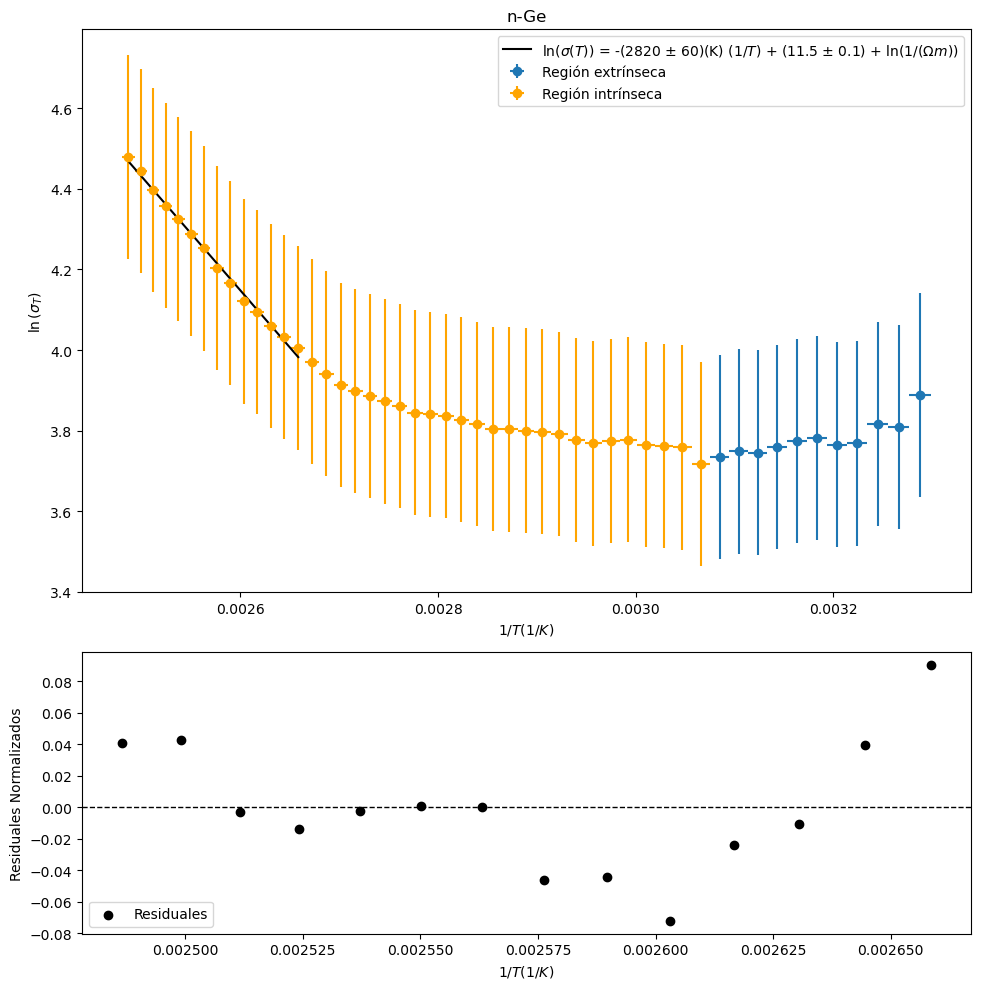

In [277]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

ax[0].errorbar(1/temp1n[:np.argmax(VL1n)],log_sigma_T1n[:np.argmax(VL1n)],label="Región extrínseca",fmt="o",
    xerr=1/temp1n[:np.argmax(VL1n)]**2, yerr=sigma_log_sigma_T1n[:np.argmax(VL1n)])
ax[0].errorbar(1/temp1n[np.argmax(VL1n):],log_sigma_T1n[np.argmax(VL1n):], label="Región intrínseca",fmt="o",color="orange",
    xerr=1/temp1n[np.argmax(VL1n):]**2, yerr=sigma_log_sigma_T1n[np.argmax(VL1n):])
ax[0].plot(1/temp1n[np.argmax(VL1n)+25:], linear_function(1/temp1n[np.argmax(VL1n)+25:],*popt_fermin1),color="black",
label=f'$\ln(\sigma(T))$ = -(2820 ± 60)(K) $(1/T)$ + ({popt_fermin1[1]:.1f} ± {popt_inc_fermin1[1]:.1f}) + $\ln(1/(\Omega m))$')
ax[0].set_title("n-Ge")
ax[0].set_xlabel("$1/T (1/K)$")
ax[0].set_ylabel("$\ln{(\sigma_T)}$")
ax[0].legend()

Residualsfermin = (log_sigma_T1n[np.argmax(VL1n)+25:] - linear_function(1/temp1n[np.argmax(VL1n)+25:],*popt_fermin1))/sigma_log_sigma_T1n[np.argmax(VL1n)+25:]

ax[1].scatter(1/temp1n[np.argmax(VL1n)+25:], Residualsfermin, alpha=1, label='Residuales', color = "k")
ax[1].axhline(0, color='black', linewidth=1, linestyle='--')
ax[1].set_xlabel('$1/T (1/K)$')
ax[1].set_ylabel('Residuales Normalizados')
ax[1].legend(loc='lower left')


plt.tight_layout()
plt.show()

In [278]:
#4.1 in-Ge

temp1in = np.array([25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 
                     53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 
                     81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 
                     107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129])

VL1in = np.array([3.63, 3.6, 3.53, 3.36, 3.21, 3.01, 2.77, 2.67, 2.53, 2.39, 
                     2.19, 2.01, 1.9, 1.73, 1.58, 1.53, 1.45, 1.33, 1.18, 1.12, 
                     1.06, 0.92, 0.9, 0.85, 0.77, 0.7, 0.66, 0.63, 0.58, 0.54, 
                     0.5, 0.47, 0.45, 0.42, 0.4, 0.37, 0.33, 0.32, 0.3, 0.28, 
                     0.26, 0.24, 0.23, 0.22, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 
                     0.14, 0.14, 0.13])

R1in = VL1in / (5*1e-3)

log_sigma_T1in = np.log(l/(R1in*At))

sigma_R1in = np.sqrt((0.001**2*(5*1e-3)**2 + (1*1e-3)**2*VL1in**2)/(5*1e-3)**4)

sigma_log_sigma_T1in = np.log(l/At)*sigma_R1in/R1in

sigma_log_sigma_T1in

array([1.52018193, 1.52018196, 1.52018202, 1.52018218, 1.52018234,
       1.52018259, 1.52018297, 1.52018316, 1.52018346, 1.52018382,
       1.52018445, 1.5201852 , 1.52018576, 1.52018684, 1.5201881 ,
       1.52018861, 1.52018953, 1.52019123, 1.52019414, 1.52019564,
       1.5201974 , 1.52020294, 1.52020395, 1.52020679, 1.52021254,
       1.52021927, 1.52022411, 1.52022837, 1.52023698, 1.52024566,
       1.5202565 , 1.52026651, 1.52027433, 1.52028821, 1.52029925,
       1.52031929, 1.52035497, 1.52036605, 1.52039161, 1.52042285,
       1.52046156, 1.52051036, 1.52053966, 1.52057305, 1.52065547,
       1.52070678, 1.52076687, 1.52083787, 1.52092259, 1.5210248 ,
       1.52114969, 1.52114969, 1.52130447])

In [279]:
popt_fermiin1, pcov_fermiin1 = curve_fit(linear_function, 1/temp1in[30:], sigma=sigma_log_sigma_T1in, log_sigma_T1in[30:])
popt_inc_fermiin1 = np.sqrt(np.diag(pcov_fermiin1))
popt_fermiin1

array([-347.23246447,    6.98892019])

In [280]:
347.232464*8.61733326e-5

0.029922178609789525

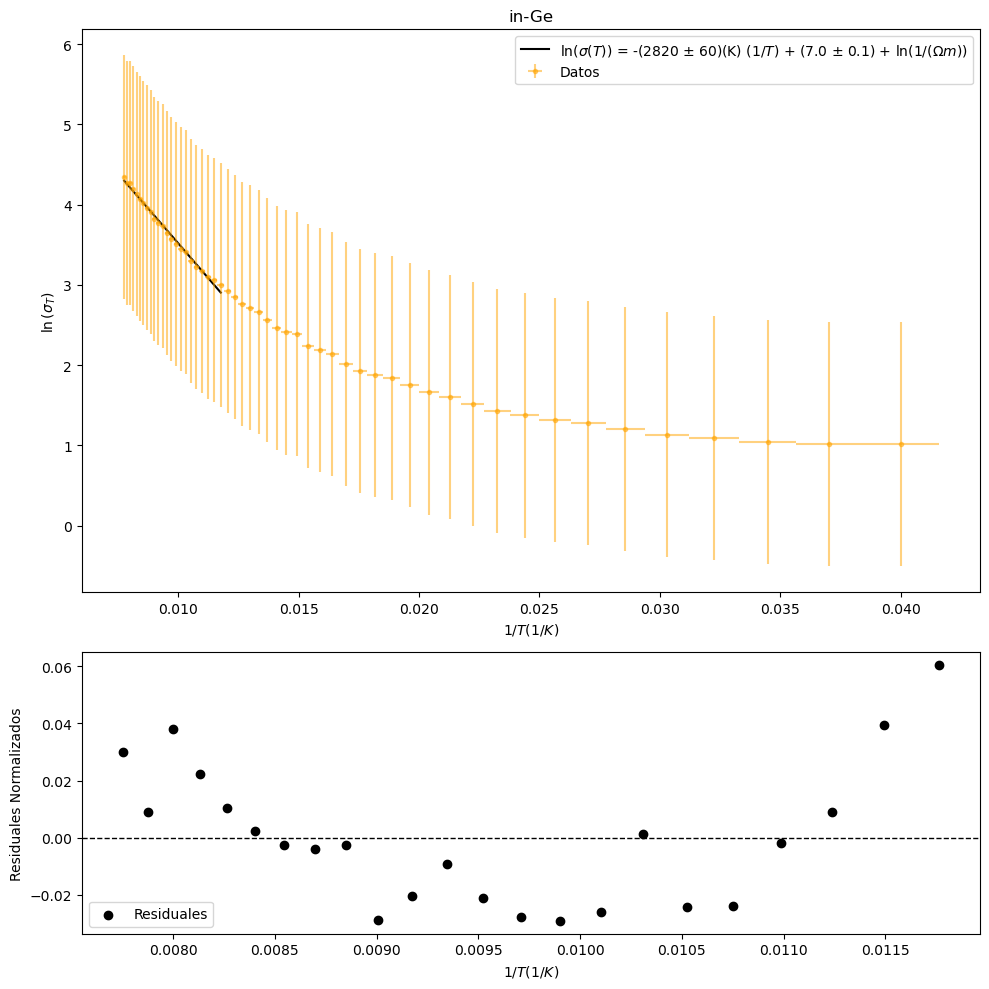

In [287]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

ax[0].plot(1/temp1in[30:], linear_function(1/temp1in[30:],*popt_fermiin1),color="black",
          label=f'$\ln(\sigma(T))$ = -(2820 ± 60)(K) $(1/T)$ + ({popt_fermiin1[1]:.1f} ± {popt_inc_fermiin1[1]:.1f}) + $\ln(1/(\Omega m))$')

ax[0].errorbar(1/temp1in,log_sigma_T1in,fmt=".", xerr=1/temp1in**2, yerr=sigma_log_sigma_T1in,label="Datos",color="orange",alpha=0.5)
ax[0].set_title("in-Ge")
ax[0].set_xlabel("$1/T (1/K)$")
ax[0].set_ylabel("$\ln{(\sigma_T)}$")
ax[0].legend()

Residualsfermiin = (log_sigma_T1in[30:] - linear_function(1/temp1in[30:],*popt_fermiin1))/sigma_log_sigma_T1in[30:]

ax[1].scatter(1/temp1in[30:], Residualsfermiin, alpha=1, label='Residuales', color = "k")
ax[1].axhline(0, color='black', linewidth=1, linestyle='--')
ax[1].set_xlabel('$1/T (1/K)$')
ax[1].set_ylabel('Residuales Normalizados')
ax[1].legend(loc='lower left')


plt.tight_layout()
plt.show()

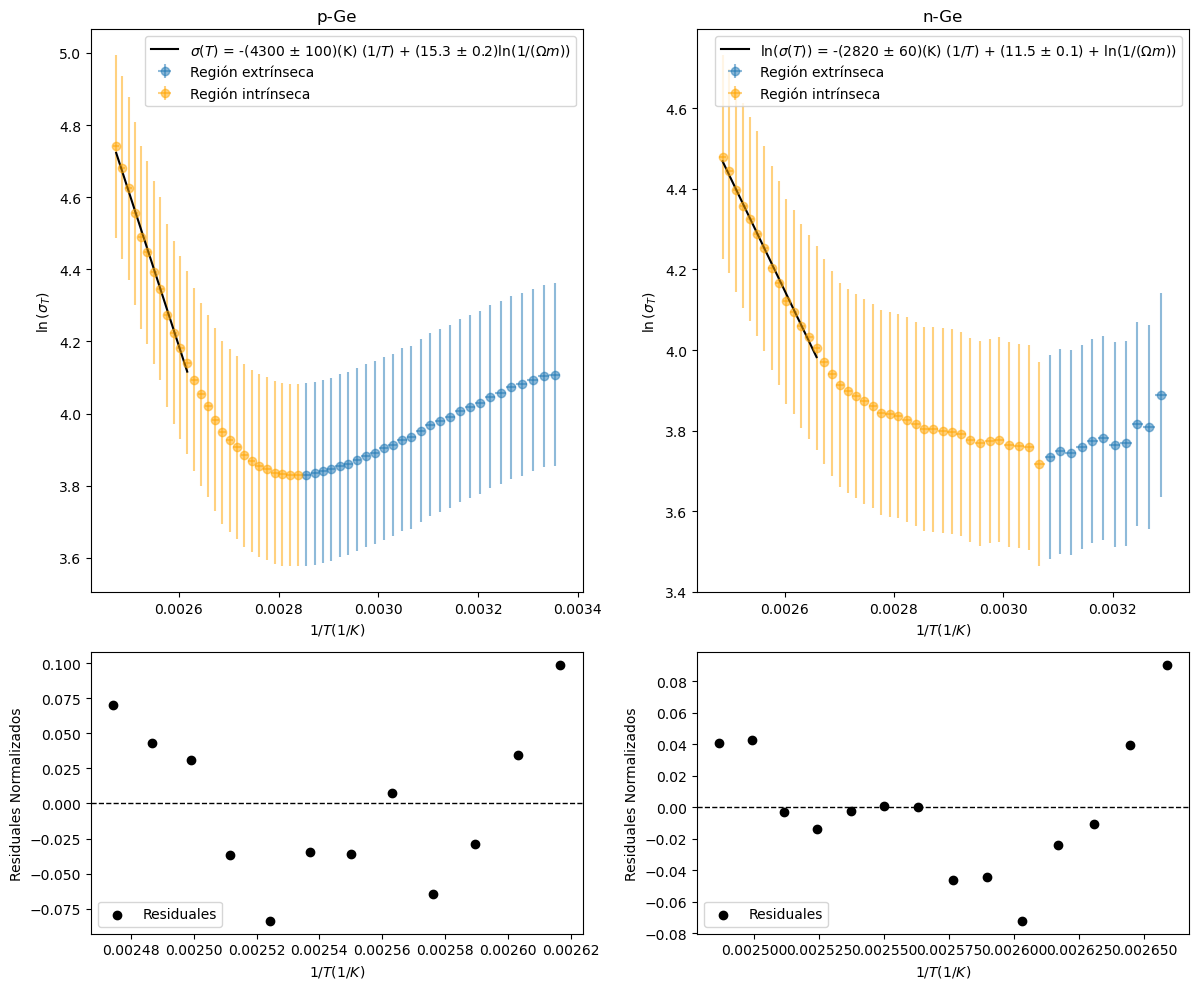

In [285]:
#dos grafics pegadas act 4.1


fig, ax = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]})


ax[0,0].errorbar(1/temp1p[:np.argmax(VL1p)],log_sigma_T1p[:np.argmax(VL1p)],label="Región extrínseca",fmt="o",
    xerr=1/temp1p[:np.argmax(VL1p)]**2, yerr=sigma_log_sigma_T1p[:np.argmax(VL1p)],alpha=0.5)
ax[0,0].errorbar(1/temp1p[np.argmax(VL1p):],log_sigma_T1p[np.argmax(VL1p):], label="Región intrínseca",fmt="o",color="orange",
    xerr=1/temp1p[np.argmax(VL1p):]**2, yerr=sigma_log_sigma_T1p[np.argmax(VL1p):],alpha=0.5)
ax[0,0].plot(1/temp1p[np.argmax(VL1p)+15:], linear_function(1/temp1p[np.argmax(VL1p)+15:],*popt_fermip1),color="black",
label=f'$\sigma(T)$ = -(4300 ± 100)(K) $(1/T)$ + ({popt_fermip1[1]:.1f} ± {popt_inc_fermip1[1]:.1f})$\ln(1/(\Omega m))$')
ax[0,0].set_title("p-Ge")
ax[0,0].set_xlabel("$1/T (1/K)$")
ax[0,0].set_ylabel("$\ln{(\sigma_T)}$")
ax[0,0].legend()

ax[1,0].scatter(1/temp1p[np.argmax(VL1p)+15:], Residualsfermip, alpha=1, label='Residuales', color = "k")
ax[1,0].axhline(0, color='black', linewidth=1, linestyle='--')
ax[1,0].set_xlabel('$1/T (1/K)$')
ax[1,0].set_ylabel('Residuales Normalizados')
ax[1,0].legend(loc='lower left')


ax[0,1].errorbar(1/temp1n[:np.argmax(VL1n)],log_sigma_T1n[:np.argmax(VL1n)],label="Región extrínseca",fmt="o",
    xerr=1/temp1n[:np.argmax(VL1n)]**2, yerr=sigma_log_sigma_T1n[:np.argmax(VL1n)],alpha=0.5)
ax[0,1].errorbar(1/temp1n[np.argmax(VL1n):],log_sigma_T1n[np.argmax(VL1n):], label="Región intrínseca",fmt="o",color="orange",
    xerr=1/temp1n[np.argmax(VL1n):]**2, yerr=sigma_log_sigma_T1n[np.argmax(VL1n):],alpha=0.5)
ax[0,1].plot(1/temp1n[np.argmax(VL1n)+25:], linear_function(1/temp1n[np.argmax(VL1n)+25:],*popt_fermin1),color="black",
label=f'$\ln(\sigma(T))$ = -(2820 ± 60)(K) $(1/T)$ + ({popt_fermin1[1]:.1f} ± {popt_inc_fermin1[1]:.1f}) + $\ln(1/(\Omega m))$')
ax[0,1].set_title("n-Ge")
ax[0,1].set_xlabel("$1/T (1/K)$")
ax[0,1].set_ylabel("$\ln{(\sigma_T)}$")
ax[0,1].legend()

ax[1,1].scatter(1/temp1n[np.argmax(VL1n)+25:], Residualsfermin, alpha=1, label='Residuales', color = "k")
ax[1,1].axhline(0, color='black', linewidth=1, linestyle='--')
ax[1,1].set_xlabel('$1/T (1/K)$')
ax[1,1].set_ylabel('Residuales Normalizados')
ax[1,1].legend(loc='lower left')

plt.tight_layout()
plt.show()



In [215]:
#4.2 p-Ge

Bz = linear_function(1.45,slope,intercept)
sigma_Bzp = sigma_Bz(1.45,slope,intercept,0.01,slope_std_err, intercept_std_err)

temp2p = np.array([27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47,
                    49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 
                    71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93,
                    95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115,
                     117]) + 273.15

VHp = -np.array([-41.8, -42, -42.1, -42.2, -42.3, -42.4, -42.6, -42.6, -42.7,
                 -42.8, -42.8, -42.8, -42.8, -42.8, -42.7, -42.7, -42.5, -42.4,
                -42.1, -41.8, -41.4, -40.9, -40.3, -39.5, -39, -37.8, -36.5, -35.8,
                -33.8, -32.5, -30.7, -28.8, -26.8, -24.4, -21.9, -20.4, -17.6, -14.9,
                -13.2, -10.6, -8.3, -6.5, -4.8, -3.1, -1.8, -0.9])

RHT = (VHp*1e-3)*w/(30*1e-3*Bz*1e-3)
sigma_RHT = (w/(30*1e-3* (Bz*1e-3)**2))*np.sqrt((VHp*1e-3)**2*(sigma_Bzp*1e-3)**2 + (Bz*1e-3)**2*(0.1*1e-3)**2)

log_T32RH = np.log(temp2p**(3/2)*RHT)
sigma_logp = 1.5*np.sqrt((1**2/(temp2p**2)) + (0.44444*sigma_RHT**2/RHT**2))

In [216]:
log_T32RH, sigma_logp

(array([ 3.17329916,  3.18803429,  3.20030854,  3.21251229,  3.2246464 ,
         3.23671174,  3.25105931,  3.26063942,  3.27250339,  3.28430185,
         3.29370185,  3.30304331,  3.31232696,  3.3215535 ,  3.32838445,
         3.33749886,  3.34186338,  3.34851265,  3.35036327,  3.35211001,
         3.35134022,  3.34798322,  3.34194718,  3.33058828,  3.32649108,
         3.30383085,  3.27737739,  3.26650802,  3.21746809,  3.18664723,
         3.13802287,  3.08244242,  3.01872999,  2.93312706,  2.83320163,
         2.77037669,  2.6308237 ,  2.47232569,  2.35917813,  2.14776971,
         1.91108368,  1.67450128,  1.37914487,  0.94972025,  0.41385376,
        -0.2715843 ]),
 array([0.01085451, 0.01083681, 0.01082065, 0.01080477, 0.01078916,
        0.01077381, 0.01075751, 0.01074388, 0.01072929, 0.01071494,
        0.01070201, 0.01068931, 0.01067683, 0.01066456, 0.0106537 ,
        0.01064185, 0.01063263, 0.01062241, 0.0106149 , 0.01060766,
        0.01060203, 0.0105981 , 0.01059605, 0.01

In [221]:
1/temp2p[10:len(temp2p)]
sigma_temp2p_inv = 1/temp2p**2

In [224]:
sigma_temp2p_inv

array([1.11000083e-05, 1.09535477e-05, 1.08099668e-05, 1.06691906e-05,
       1.05311465e-05, 1.03957644e-05, 1.02629762e-05, 1.01327160e-05,
       1.00049202e-05, 9.87952683e-06, 9.75647616e-06, 9.63571017e-06,
       9.51717266e-06, 9.40080911e-06, 9.28656671e-06, 9.17439420e-06,
       9.06424189e-06, 8.95606154e-06, 8.84980637e-06, 8.74543098e-06,
       8.64289127e-06, 8.54214445e-06, 8.44314897e-06, 8.34586447e-06,
       8.25025175e-06, 8.15627272e-06, 8.06389036e-06, 7.97306873e-06,
       7.88377285e-06, 7.79596874e-06, 7.70962336e-06, 7.62470457e-06,
       7.54118112e-06, 7.45902260e-06, 7.37819944e-06, 7.29868285e-06,
       7.22044482e-06, 7.14345809e-06, 7.06769611e-06, 6.99313304e-06,
       6.91974372e-06, 6.84750365e-06, 6.77638894e-06, 6.70637635e-06,
       6.63744322e-06, 6.56956747e-06])

In [218]:
popt_fermip2, pcov_fermip2 = curve_fit(linear_function, 1/temp2p[25:37], log_T32RH[25:37])
popt_fermip2

array([3852.69235999,   -7.61686693])

In [219]:
popt_inc_fermip2 = np.sqrt(np.diag(pcov_fermip2))
popt_inc_fermip2

array([317.25657038,   0.87894401])

In [220]:
2*3852.69235*8.61733326e-5

0.6639986785640511

In [227]:
len(sigma_temp2p_inv[:np.argmax(log_T32RH)])

19

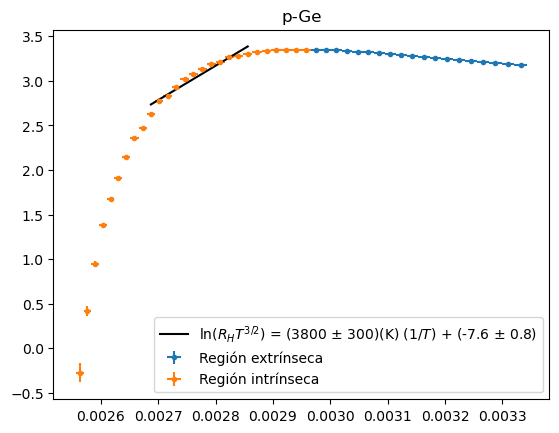

In [231]:
plt.errorbar(1/temp2p[:np.argmax(log_T32RH)],log_T32RH[:np.argmax(log_T32RH)],
            yerr = sigma_logp[:np.argmax(log_T32RH)] , xerr = sigma_temp2p_inv[:np.argmax(log_T32RH)],
            label="Región extrínseca", fmt = ".")

plt.errorbar(1/temp2p[np.argmax(log_T32RH):],log_T32RH[np.argmax(log_T32RH):], 
            yerr = sigma_logp[np.argmax(log_T32RH):] , xerr = sigma_temp2p_inv[np.argmax(log_T32RH):],
            label="Región intrínseca", fmt = ".")

plt.plot(1/temp2p[25:37], linear_function(1/temp2p[25:37],*popt_fermip2),color="black",
            label="$\ln(R_H T^{3/2})$ = (3800 ± 300)(K) $(1/T)$ + (-7.6 ± 0.8)")
            
plt.title("p-Ge")
plt.legend()

In [234]:
temp2n = np.array([37, 39, 41, 43, 45, 47, 49, 
                51, 53, 55, 57, 59, 61, 63, 65, 
                67, 69, 71, 73, 75, 77, 79, 81, 
                83, 85, 87, 89, 91, 93, 95, 97, 
                99, 115, 117, 119]) +273.15

VHn = np.array([65.2, 65, 64.7, 64.5, 64, 63.9, 63.7, 
                63.7, 63.5, 63.4, 63.2, 62.9, 63.4, 64, 
                63, 62.9, 62.8, 62.8, 62.8, 62.7, 62.5, 
                62.3, 62.9, 62.8, 62.4, 61.4, 60.5, 59.7, 
                58.8, 57.9, 55, 53, 33.7, 31.9, 30.6])

RHTn = (VHn*1e-3)*w/(30*1e-3*Bz*1e-3)

sigma_RHTn = (w/(30*1e-3* (Bz*1e-3)**2))*np.sqrt((VHn*1e-3)**2*(sigma_Bzp*1e-3)**2 + (Bz*1e-3)**2*(0.1*1e-3)**2)

log_T32RHn = np.log(temp2n**(3/2)*RHTn)

sigma_logn = 1.5*np.sqrt((1**2/(temp2n**2)) + (0.44444*sigma_RHTn**2/RHTn**2))

In [235]:
sigma_temp2n_inv = 1/temp2n**2

In [188]:
popt_fermin2, pcov_fermin2 = curve_fit(linear_function, 1/temp2n[np.argmax(log_T32RHn):],
                                             log_T32RHn[np.argmax(log_T32RHn):])
popt_fermin2

array([2620.83109601,   -3.38643161])

In [189]:
2*2620.8310587*8.61733326e-5

0.45169149301953043

In [190]:
np.sqrt(np.diag(pcov_fermin2))

array([218.81497297,   0.58913141])

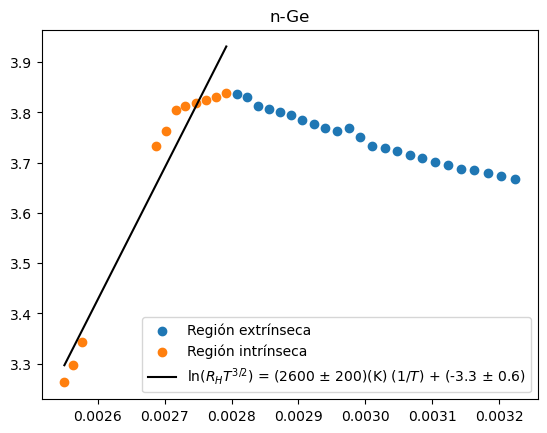

In [194]:
plt.scatter(1/temp2n[:np.argmax(log_T32RHn)],log_T32RHn[:np.argmax(log_T32RHn)],label="Región extrínseca")
plt.scatter(1/temp2n[np.argmax(log_T32RHn):],log_T32RHn[np.argmax(log_T32RHn):], label="Región intrínseca")
plt.plot(1/temp2n[np.argmax(log_T32RHn):], linear_function(1/temp2n[np.argmax(log_T32RHn):],*popt_fermin2),color="black",
label='$\ln(R_H T^{3/2})$ = (2600 ± 200)(K) $(1/T)$ + (-3.3 ± 0.6)')
plt.title("n-Ge")
plt.legend()

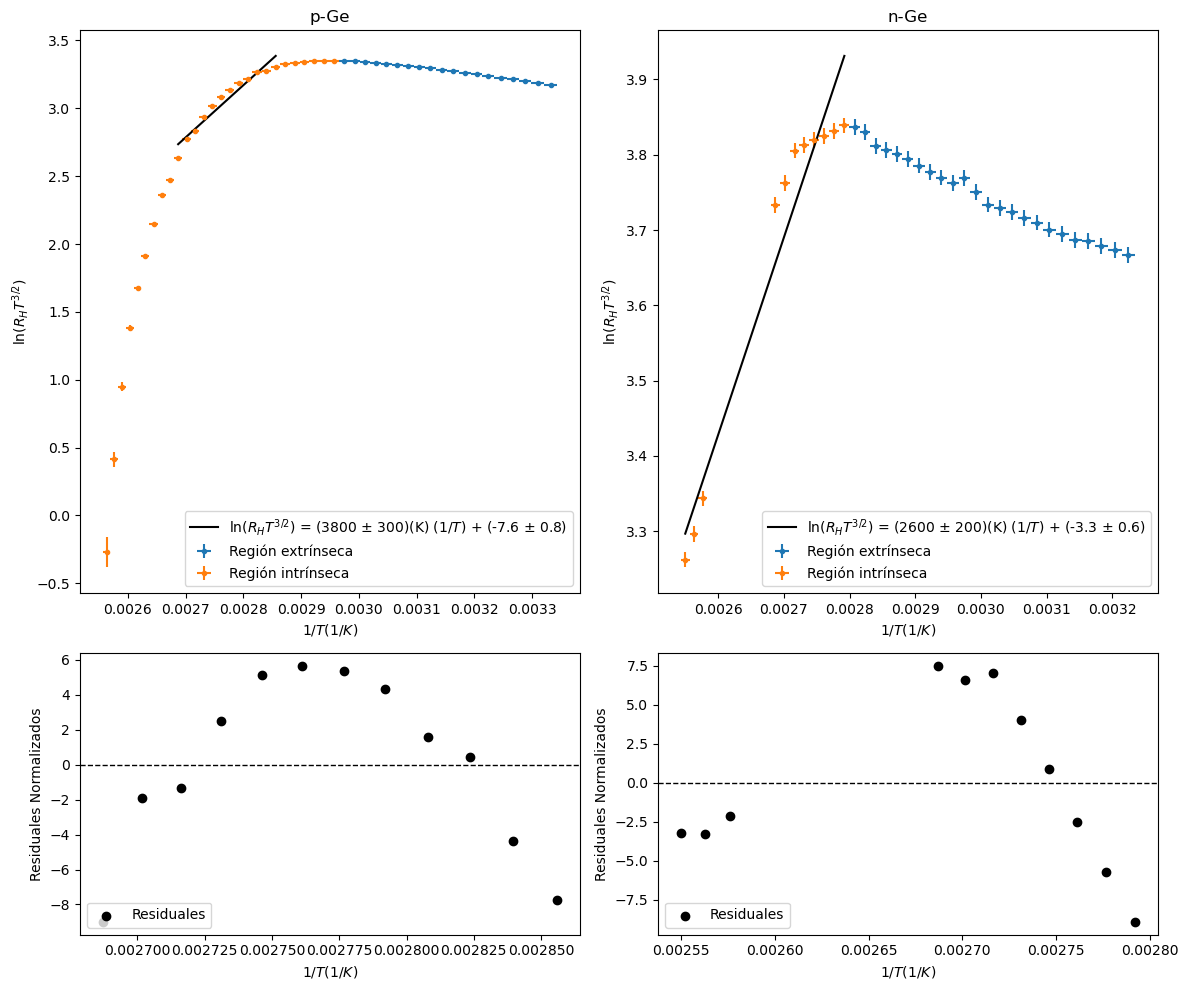

In [251]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]})

ax[0,1].errorbar(1/temp2n[:np.argmax(log_T32RHn)],log_T32RHn[:np.argmax(log_T32RHn)],
                yerr = sigma_logn[:np.argmax(log_T32RHn)] , xerr = sigma_temp2n_inv[:np.argmax(log_T32RHn)],
                label="Región extrínseca", fmt = ".")

ax[0,1].errorbar(1/temp2n[np.argmax(log_T32RHn):],log_T32RHn[np.argmax(log_T32RHn):],
                yerr = sigma_logn[np.argmax(log_T32RHn):] , xerr = sigma_temp2n_inv[np.argmax(log_T32RHn):],
                label="Región intrínseca", fmt = ".")

ax[0,1].plot(1/temp2n[np.argmax(log_T32RHn):], linear_function(1/temp2n[np.argmax(log_T32RHn):],*popt_fermin2),color="black",
label='$\ln(R_H T^{3/2})$ = (2600 ± 200)(K) $(1/T)$ + (-3.3 ± 0.6)')
ax[0,1].set_title("n-Ge")
ax[0,1].legend()
ax[0,1].set_xlabel("$1/T (1/K)$")
ax[0,1].set_ylabel("$\ln(R_H T^{3/2})$")


ax[0,0].errorbar(1/temp2p[:np.argmax(log_T32RH)],log_T32RH[:np.argmax(log_T32RH)],
            yerr = sigma_logp[:np.argmax(log_T32RH)] , xerr = sigma_temp2p_inv[:np.argmax(log_T32RH)],
            label="Región extrínseca", fmt = ".")

ax[0,0].errorbar(1/temp2p[np.argmax(log_T32RH):],log_T32RH[np.argmax(log_T32RH):], 
            yerr = sigma_logp[np.argmax(log_T32RH):] , xerr = sigma_temp2p_inv[np.argmax(log_T32RH):],
            label="Región intrínseca", fmt = ".")

ax[0,0].plot(1/temp2p[25:37], linear_function(1/temp2p[25:37],*popt_fermip2),color="black",
            label="$\ln(R_H T^{3/2})$ = (3800 ± 300)(K) $(1/T)$ + (-7.6 ± 0.8)")
            
ax[0,0].set_title("p-Ge")
ax[0,0].legend()

ax[0,0].set_xlabel("$1/T (1/K)$")
ax[0,0].set_ylabel("$\ln(R_H T^{3/2})$")

ResidualspGe = (log_T32RH[25:37] - linear_function(1/temp2p[25:37],*popt_fermip2))/sigma_logp[25:37]
ResidualsnGe = (log_T32RHn[np.argmax(log_T32RHn):] - linear_function(1/temp2n[np.argmax(log_T32RHn):],*popt_fermin2))/sigma_logn[np.argmax(log_T32RHn):]

ax[1,0].scatter(1/temp2p[25:37], ResidualspGe, alpha=1, label='Residuales', color='k')
ax[1,1].scatter(1/temp2n[np.argmax(log_T32RHn):], ResidualsnGe, alpha=1, label='Residuales', color='k')


ax[1,0].axhline(0, color='k', linewidth=1, linestyle='--')
ax[1,0].set_xlabel("$1/T (1/K)$")
ax[1,0].set_ylabel('Residuales Normalizados')
ax[1,0].legend(loc='lower left')

ax[1,1].axhline(0, color='k', linewidth=1, linestyle='--')
ax[1,1].set_xlabel("$1/T (1/K)$")
ax[1,1].set_ylabel('Residuales Normalizados')
ax[1,1].legend(loc='lower left')

plt.tight_layout()
plt.show()